<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex7_3Dscatter_Voyager_trajectories_CRs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

#import itertools

#import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib import rc
from matplotlib import pyplot
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

import altair as alt

Voyager 1 and 2 Cosmic Ray Flux per year since launch in 1977


In [0]:
newlist = []

col1=1  # up to 4.6 MeV/n Hydrogen flux 
col2=2  # up to 6.2 MeV/n Hydrogen flux
col3=15 # up to 346 MeV/n protons
col4=16 # 4.6 MeV/n Helium flux 
col5=17 # 6.2 MeV/n Helium flux 
col6=34 # 661 MeV/n Helium flux 

#Voyager 1
for i in range(1977, 2020): #2020):
    #print(i)
    urlx= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager1/particle/crs/six_hour/vy1crs_6hour_' + str(i) +'.asc'
    #print(urlx) works!
    df = pd.read_table(urlx,
                  sep="\s+",
                  skiprows=[i for i in range(0,35)], 
                  usecols=[0, col1, col2, col3, col4, col5, col6],
                  names=['year_time', 'p_4MeV', 'p_6MeV', 'p_346MeV', 'He_4MeV', 'He_6MeV', 'He_661MeV'])
    mean1 = np.median(df.p_4MeV)
    mean2 = np.median(df.p_6MeV)
    mean3 = np.median(df.p_346MeV)
    mean4 = np.median(df.He_4MeV)
    mean5 = np.median(df.He_6MeV)
    mean6 = np.median(df.He_661MeV)
    newlist.append((i, mean1, mean2, mean3, mean4, mean5, mean6)) #, mean)   
df0=pd.DataFrame(newlist, columns=('year', 'av_p4', 'av_p6', 'av_p346','av_He4', 'av_He6', 'av_He661' ))
#print(df0)

#Voyager 2
newlist1 = []
for i in range(1977, 2020): #2020):
    #print(i)url6= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/particle/crs/one_day/vy2crs_1d_1977.asc'
    urlx= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/particle/crs/one_day/vy2crs_1d_' + str(i) +'.asc'
    #print(urlx) works!
    df = pd.read_table(urlx,
                  sep="\s+",
                  skiprows=[i for i in range(0,38)], 
                  usecols=[0, col1, col2, col3, col4, col5, col6],
                  names=['year_time', 'p_4MeV', 'p_6MeV', 'p_346MeV', 'He_4MeV', 'He_6MeV', 'He_661MeV'])
    mean1 = np.median(df.p_4MeV)
    mean2 = np.median(df.p_6MeV)
    mean3 = np.median(df.p_346MeV)
    mean4 = np.median(df.He_4MeV)
    mean5 = np.median(df.He_6MeV)
    mean6 = np.median(df.He_661MeV)
    newlist1.append((i, mean1, mean2, mean3, mean4, mean5, mean6)) #, mean)   
df00=pd.DataFrame(newlist1, columns=('year', 'av_p4', 'av_p6', 'av_p346','av_He4', 'av_He6', 'av_He661' ))
#print(df00)


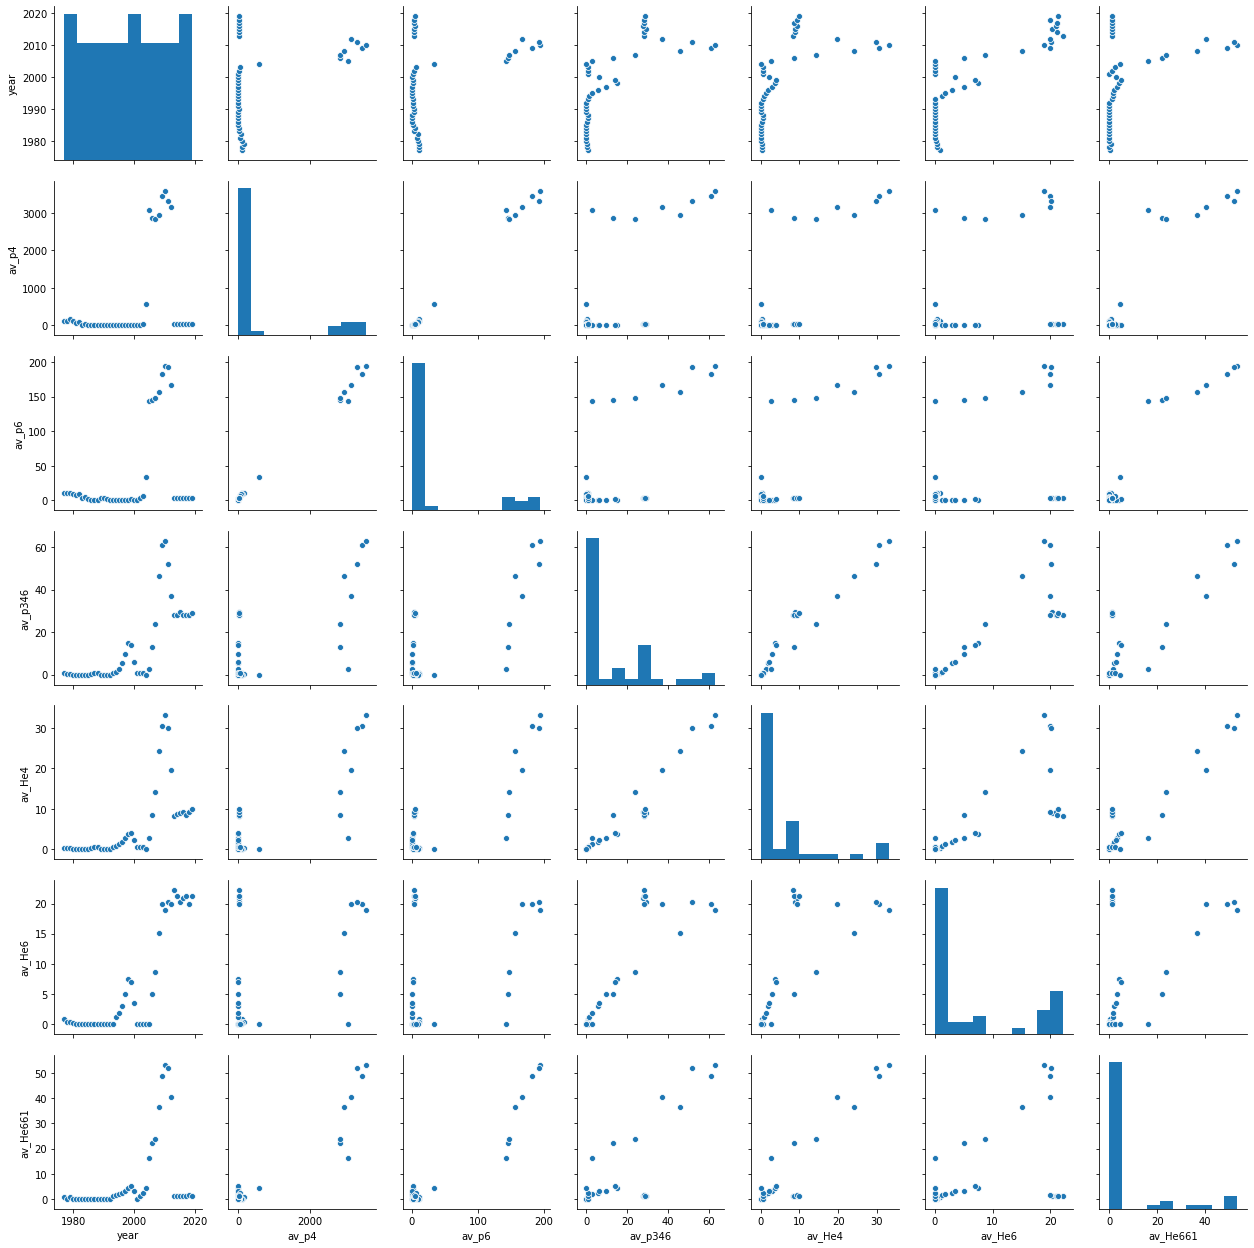

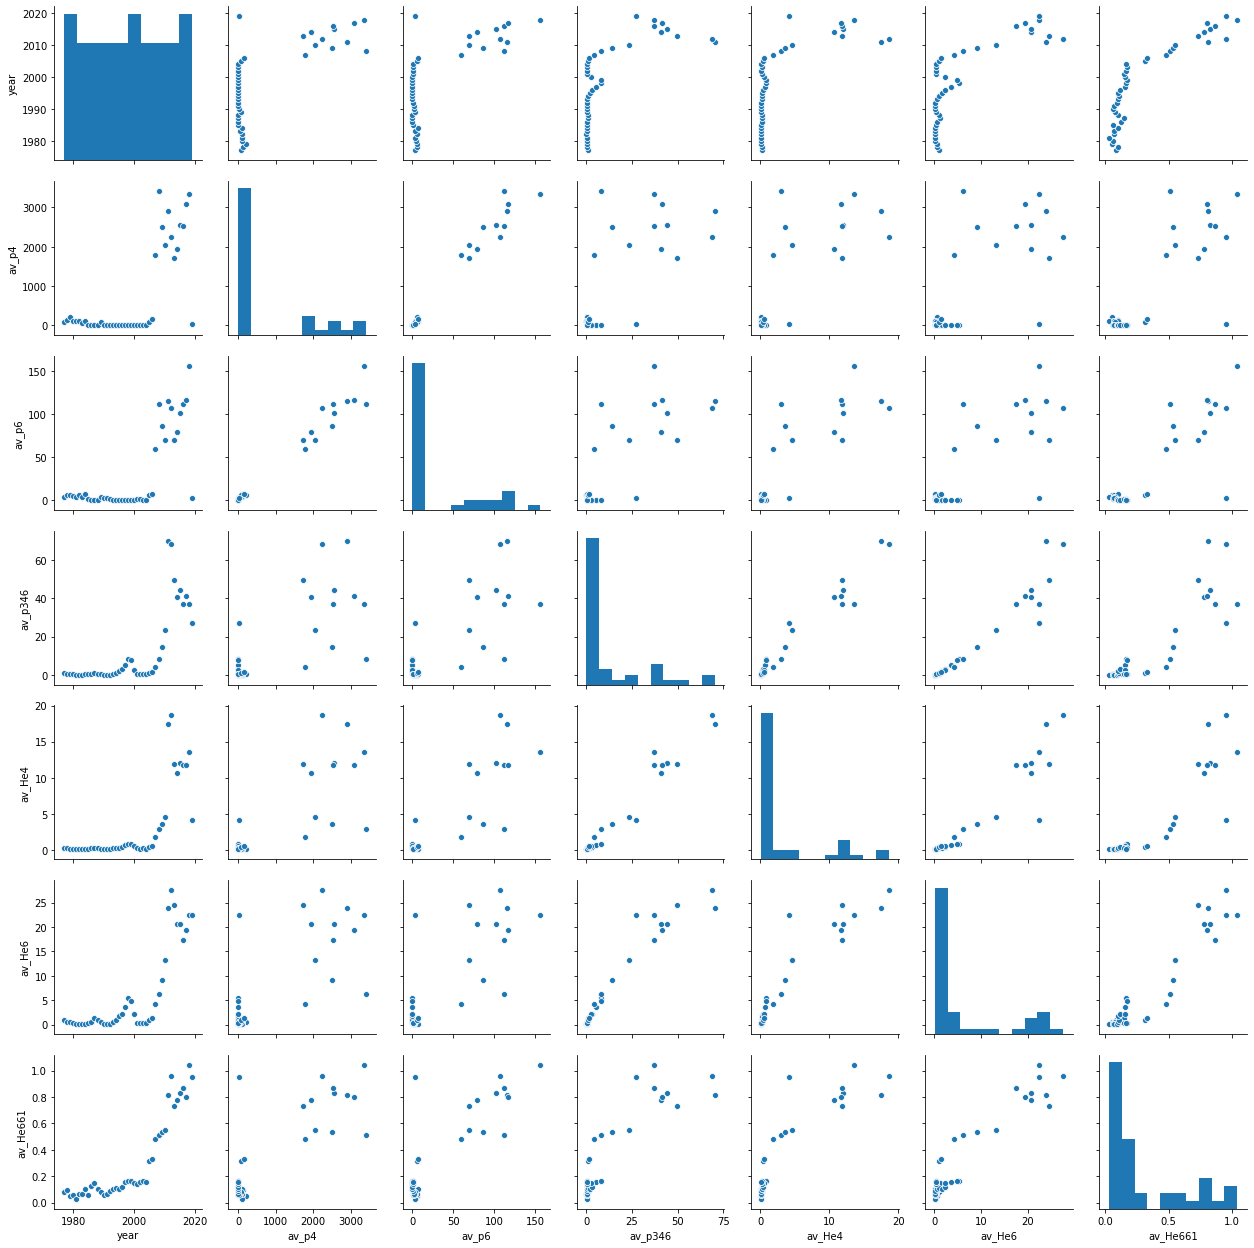

In [39]:
# Understanding distribution and correlation of different columns in dataframe
#df = sns.load_dataset("iris")
sns.pairplot(df0) #, hue="av_p4")
sns.pairplot(df00) #, hue="av_p4")

#this shows there are some outliers (missing data) in df0 dataset, so be careful and dont take the mean but the median

Voyager 1 and 2 Trajectory per year since launch in 1977


In [40]:
# Voyagers Trajectories

# Voyager 1:
# Voyager 1 Interplanetary Cruise Trajectory Data from the NSSDC Satellite
# Situation Center (SSC) - Daily Values for 1977 to 2005
# SECLAT= SOLAR ECLIPTIC LATITUDE IN DEGREES
#heliocentric ecliptic coordinates
# 1.6. The Geocentric Ecliptical Longitude and Latitude
#https://aa.quae.nl/en/reken/hemelpositie.html
#lambda = 168.737 deg
#beta = 1.208 deg

url9= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager1/traj/ssc/vy1trj_ssc_1d.asc'
df9 = pd.read_csv(url9, header=None, 
                  sep='\s+',
                  usecols=[0,1,2,3,4,5,6,7],
                  names=['YY', 'DDD',  'RAD',  'SECLAT',  'SECLON',  'HELLAT',  'HELLON',  'HILLON'])

# Voyager 2:
# Voyager 2 Interplanetary Cruise Trajectory Data from the NSSDC Satellite
# Situation Center (SSC) - Daily Values for 1977 to 2005
# https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/traj/ssc/vy2trj_ssc_1d.asc

url10= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/traj/ssc/vy2trj_ssc_1d.asc'
df10 = pd.read_csv(url10, header=None, 
                  sep='\s+',
                  usecols=[0,1,2,3,4,5,6,7],
                  names=['YY', 'DDD',  'RAD',  'SECLAT',  'SECLON',  'HELLAT',  'HELLON',  'HILLON'])
print(df10)

        YY    DDD    RAD  SECLAT  SECLON   HELLAT  HELLON  HILLON
0     1977  237.0   1.01     0.1   333.0   7.1673  122.98  257.45
1     1977  238.0   1.00     0.1   334.3   7.2010  110.10  258.76
2     1977  239.0   1.00     0.1   335.6   7.2311   97.23  260.07
3     1977  240.0   1.00     0.1   336.9   7.2575   84.35  261.38
4     1977  241.0   1.00     0.2   338.2   7.3802   71.48  262.68
...    ...    ...    ...     ...     ...      ...     ...     ...
9995  2005    5.0  75.34   -29.8   288.2 -25.7517  148.01  215.53
9996  2005    6.0  75.35   -29.8   288.2 -25.7517  133.83  215.53
9997  2005    7.0  75.35   -29.8   288.2 -25.7517  119.64  215.53
9998  2005    8.0  75.36   -29.8   288.2 -25.7517  105.46  215.53
9999  2005    9.0  75.37   -29.8   288.2 -25.7517   91.27  215.53

[10000 rows x 8 columns]


Solar Activity Near Earth since Voyager launch

In [0]:
#  IMF and Solar Wind near Earth's orbit, Sun activity
#  https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/

#  hourly mean values of the interplanetary magnetic  field (IMF) and solar wind plasma parameters 
#  measured by various spacecraft near  the  Earth's  orbit,  as  well  as  
#  geomagnetic and solar activity indices, and energetic proton fluxes
#  known as OMNI2 data. 

url = 'https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni_yearly.dat'
df2 = pd.read_csv(url, sep="\s+", header=None, usecols=[0,8,22,23,27,39, 42,54],
                  names=['year', 'B_field', 'proton_temperature', 'proton_density',
                         'alpha_proton','sunspots','proton_flux','mach_number'])


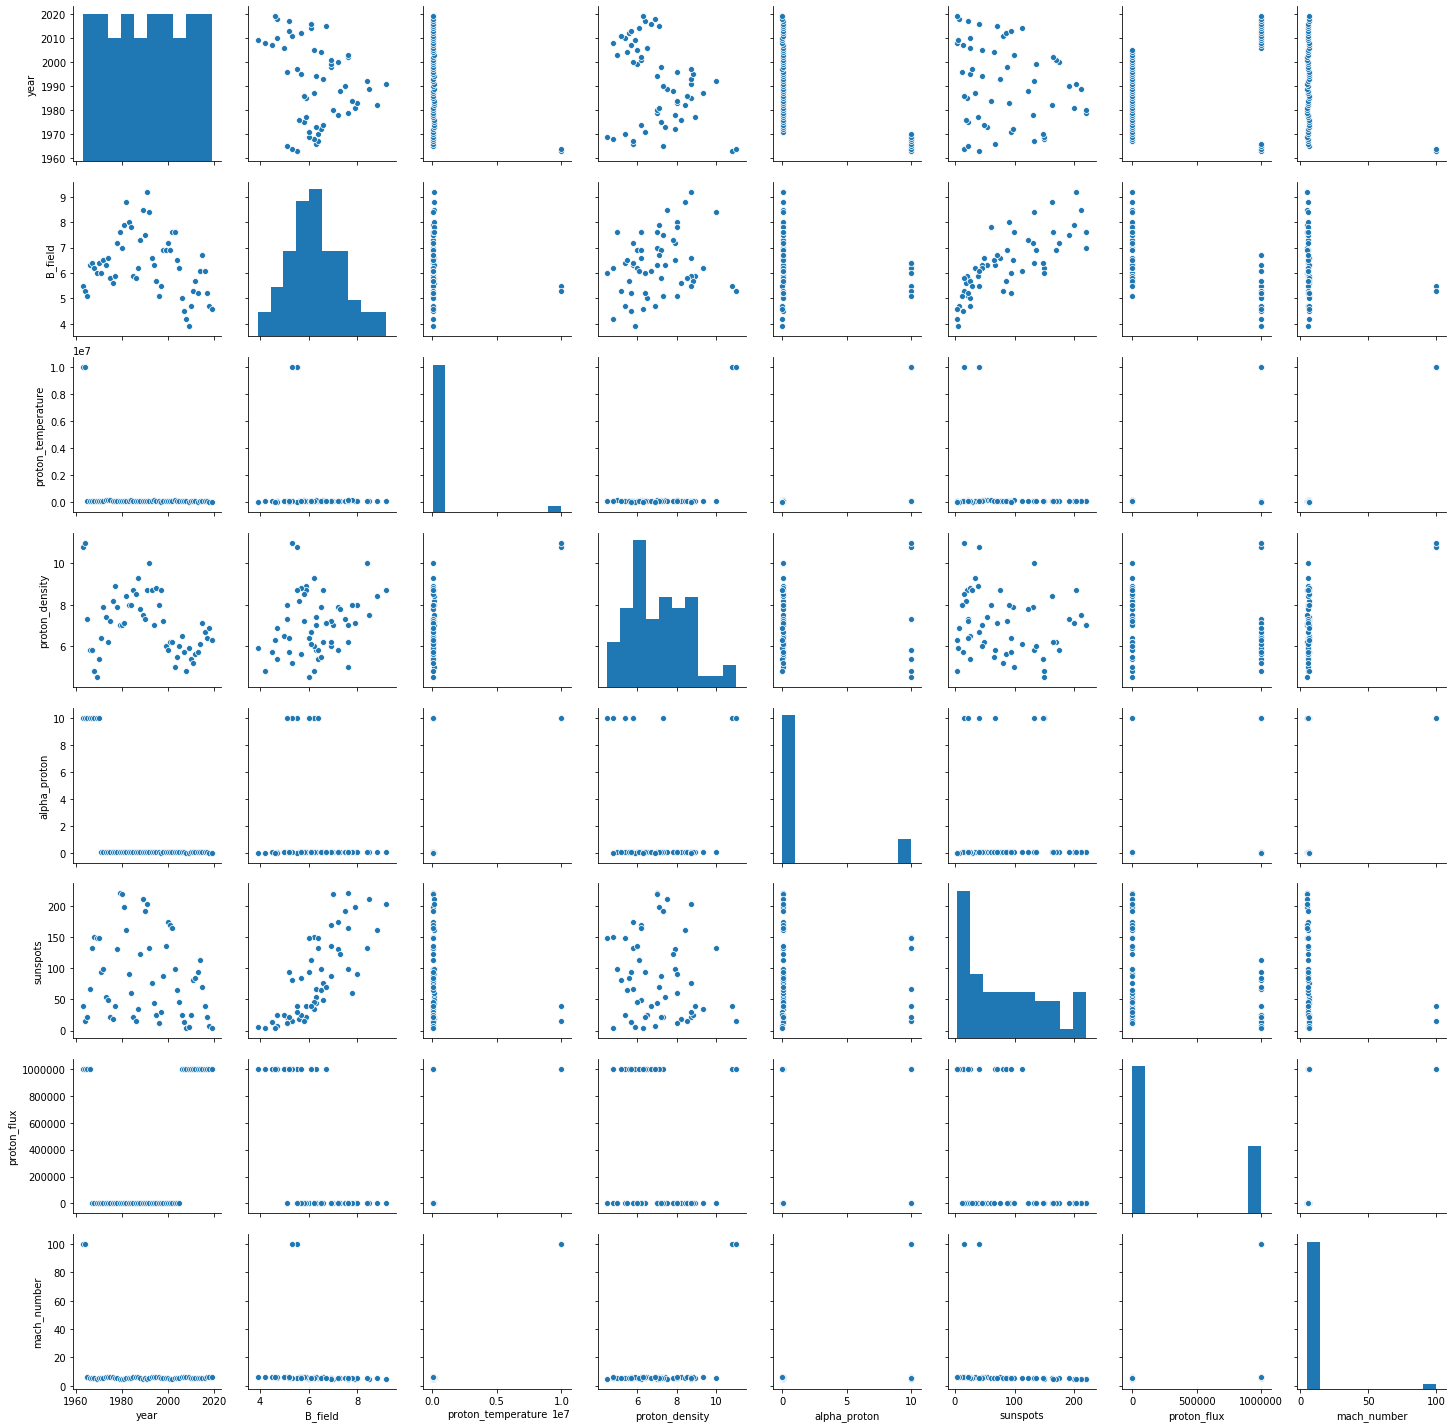

In [42]:
sns.pairplot(df2)

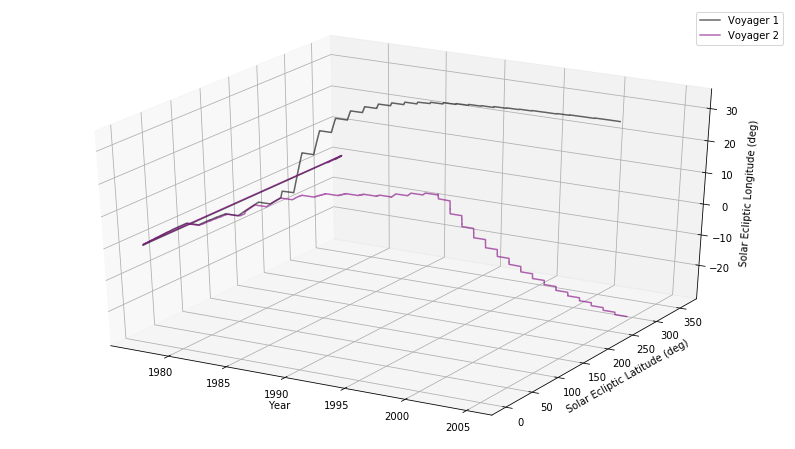

In [72]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')

x1 = df9.YY
z1 = df9.SECLAT
y1 = df9.SECLON
#ax.plot3D(x1, y1, z1,  marker='o', markersize=3, alpha=0.6, linestyle=' ', label='Voyager 1')
ax.plot3D(x1, y1, z1,  alpha=0.6, linestyle='-', label='Voyager 1', color='black')

x2 = df10.YY
z2 = df10.SECLAT
y2 = df10.SECLON
#ax.plot3D(x2, y2, z2, marker='o', markersize=3, alpha=0.6, linestyle=' ', label='Voyager 2')
ax.plot3D(x2, y2, z2, alpha=0.6, linestyle='-', label='Voyager 2', color='purple')

ax.set_xlabel('Year')
ax.set_ylabel('Solar Ecliptic Latitude (deg)')
ax.set_zlabel('Solar Ecliptic Longitude (deg)')

plt.legend()
plt.show()

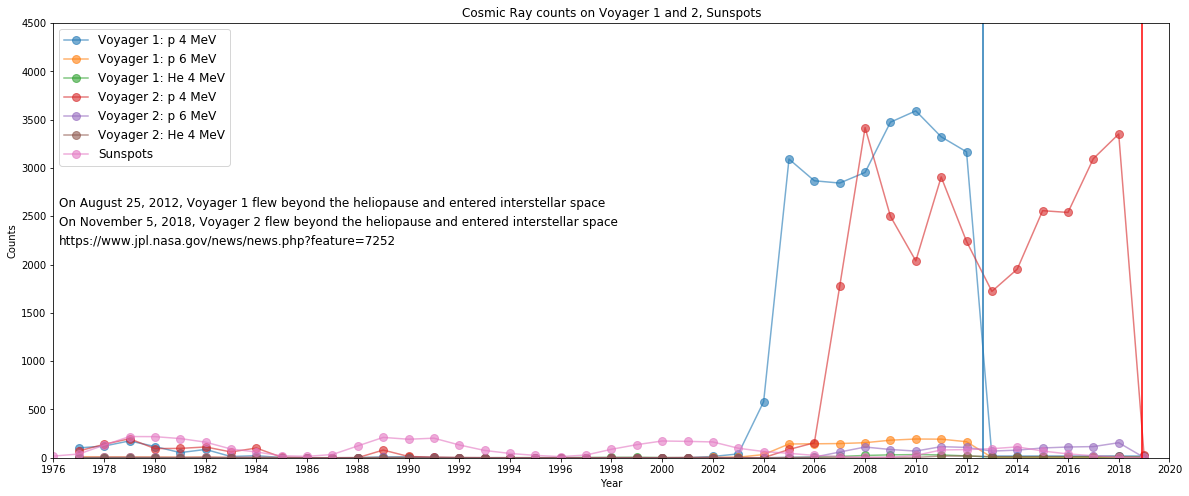

In [44]:
plt.figure(figsize=(20, 8))

#Voyager 1
plt.plot(df0.year,df0.av_p4, label='Voyager 1: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_p6, label='Voyager 1: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_He4, label='Voyager 1: He 4 MeV', marker='o', markersize=8, alpha=0.6)

#Voyager 2
plt.plot(df00.year,df00.av_p4, label='Voyager 2: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_p6, label='Voyager 2: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_He4, label='Voyager 2: He 4 MeV', marker='o', markersize=8, alpha=0.6)


plt.plot(df2.year, df2.sunspots, label='Sunspots', marker='o', markersize=8, alpha=0.6)

plt.title('Cosmic Ray counts on Voyager 1 and 2, Sunspots')

plt.text(1976.2, 2600, 'On August 25, 2012, Voyager 1 flew beyond the heliopause and entered interstellar space',fontsize=12)
plt.text(1976.2, 2400, 'On November 5, 2018, Voyager 2 flew beyond the heliopause and entered interstellar space',fontsize=12)
plt.text(1976.2, 2200, 'https://www.jpl.nasa.gov/news/news.php?feature=7252',fontsize=12)

plt.axvline(x=2012.66)
plt.axvline(x=2018.92, c='r')

plt.legend(prop = { 'size' : 12 },loc='upper left')

plt.xlim(1976, 2020)
plt.ylim(0, 4500) #300)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.ylabel("Counts")
plt.xlabel("Year")

plt.show()


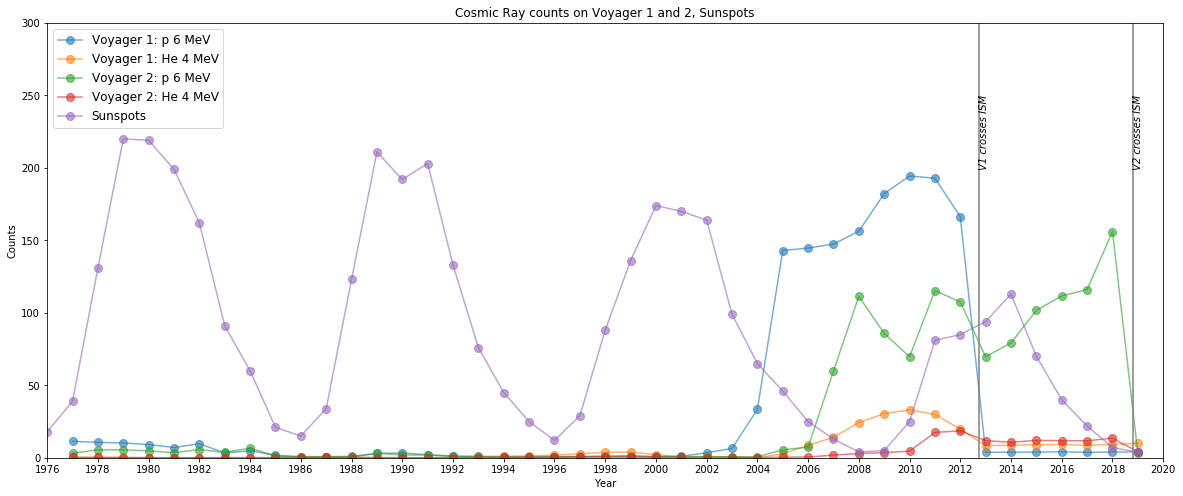

In [45]:
plt.figure(figsize=(20, 8))

#Voyager 1
#plt.plot(df0.year,df0.av_p4, label='Voyager 1: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_p6, label='Voyager 1: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_He4, label='Voyager 1: He 4 MeV', marker='o', markersize=8, alpha=0.6)

#Voyager 2
#plt.plot(df00.year,df00.av_p4, label='Voyager 2: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_p6, label='Voyager 2: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_He4, label='Voyager 2: He 4 MeV', marker='o', markersize=8, alpha=0.6)


plt.plot(df2.year, df2.sunspots, label='Sunspots', marker='o', markersize=8, alpha=0.6)

plt.title('Cosmic Ray counts on Voyager 1 and 2, Sunspots')

# plt.text(1976.2, 260, 'On August 25, 2012, Voyager 1 flew beyond the heliopause and entered interstellar space',fontsize=12)
# plt.text(1976.2, 240, 'On November 5, 2018, Voyager 2 flew beyond the heliopause and entered interstellar space',fontsize=12)
# plt.text(1976.2, 220, 'https://www.jpl.nasa.gov/news/news.php?feature=7252',fontsize=12)

plt.text(2012.75, 200, 'V1 crosses ISM', style='italic', rotation=90)
plt.text(2018.8, 200, 'V2 crosses ISM', style='italic', rotation=90)

plt.axvline(x=2012.75, c='gray')
plt.axvline(x=2018.8, c='gray')

plt.legend(prop = { 'size' : 12 },loc='upper left')

plt.xlim(1976, 2020)
plt.ylim(0, 300)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.ylabel("Counts")
plt.xlabel("Year")

plt.show()

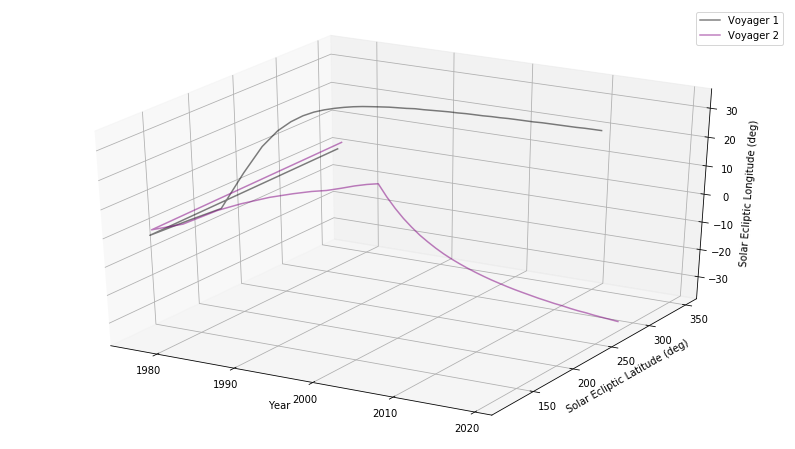

In [73]:
# To do:
# Calculate average SECLAT and SECLON per year (1977 to 2005)
# or use data from 1977 to 2019 from here
#https://omniweb.gsfc.nasa.gov/coho/helios/heli.html 

fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')

#Voy 1:
url='https://raw.githubusercontent.com/lgavmarin/data/master/v1_trajectory.lst'
dfv1 = pd.read_table(url, sep="\s+")
x1=dfv1.YEAR
z1=dfv1.SE_LAT
y1=dfv1.SE_LON
#ax.plot3D(x1, y1, z1,  marker='o', markersize=3,  linestyle=' ', label='V1')
ax.plot3D(x1, y1, z1,   linestyle='-', color='black', alpha=0.5, label='Voyager 1')


#Voy 1:
url='https://raw.githubusercontent.com/lgavmarin/data/master/v2_trajectory.lst'
dfv2 = pd.read_table(url, sep="\s+")
x2=dfv2.YEAR
z2=dfv2.SE_LAT
y2=dfv2.SE_LON
#ax.plot3D(x2, y2, z2,  marker='o', markersize=3,  linestyle=' ', label='V2')
ax.plot3D(x2, y2, z2,  linestyle='-', color='purple', alpha=0.5, label='Voyager 2')

ax.set_xlabel('Year')
ax.set_ylabel('Solar Ecliptic Latitude (deg)')
ax.set_zlabel('Solar Ecliptic Longitude (deg)')

plt.legend()
plt.show()

In [47]:
df0.shape # 43 r, 4 col
dfv1.shape # 43 r, 4 col
#pd.merge(df0, dfv1)#, how='left', on='key')
#dfj=df0.join(dfv1)#, lsuffix='_caller', rsuffix='_other')
dfj=df0.join(df00, lsuffix='_v1', rsuffix='_v2')
dfj1=dfv1.join(dfv2, lsuffix='_v1', rsuffix='_v2')
dfj2=dfj.join(dfj1)

dfj2
#dfj2.SE_LAT_v1

,year_v1,av_p4_v1,av_p6_v1,av_p346_v1,av_He4_v1,av_He6_v1,av_He661_v1,year_v2,av_p4_v2,av_p6_v2,av_p346_v2,av_He4_v2,av_He6_v2,av_He661_v2,YEAR_v1,DAY_v1,RAD_AU_v1,SE_LAT_v1,SE_LON_v1,YEAR_v2,DAY_v2,RAD_AU_v2,SE_LAT_v2,SE_LON_v2
0,1977,102.4000,11.39000,0.69270,0.41900,0.9060,0.5703,1977,70.42000,3.13100,0.94060,0.25230,0.97890,0.081550,1977,249,1.01,0.0,343.4,1977,249,1.01,1.7,348.4
1,1978,121.6000,10.62000,0.29720,0.26320,0.4343,0.0000,1978,139.60000,5.50800,0.65700,0.23620,0.60620,0.097440,1978,249,4.09,0.7,116.3,1978,249,3.83,2.3,118.5
2,1979,174.9000,10.25000,0.35000,0.28170,0.3866,0.7327,1979,197.30000,5.55900,0.41950,0.15870,0.44410,0.051040,1979,249,6.12,1.5,150.9,1979,249,5.55,1.1,144.1
3,1980,116.8000,9.12400,0.00000,0.00000,0.1477,0.0000,1980,95.52000,4.75600,0.26095,0.11410,0.21860,0.059015,1980,249,8.90,2.2,178.6,1980,249,7.38,2.1,174.6
4,1981,53.7300,7.09200,0.00000,0.00000,0.0000,0.0000,1981,97.28000,3.53800,0.16020,0.06717,0.10870,0.028600,1981,248,11.21,12.6,196.7,1981,248,9.61,2.4,192.2
5,1982,86.4900,9.69400,0.00000,0.00000,0.0000,0.0000,1982,112.30000,5.64350,0.15295,0.10505,0.09563,0.067700,1982,248,14.05,20.4,209.9,1982,248,10.46,1.8,216.2
6,1983,12.8500,3.34300,0.00000,0.00000,0.0000,0.0000,1983,60.47000,3.79900,0.16700,0.10480,0.13175,0.065760,1983,248,17.30,25.0,219.1,1983,248,12.41,1.0,234.6
7,1984,21.7000,4.88800,0.00000,0.00000,0.0000,0.0000,1984,101.10000,6.62900,0.23260,0.14350,0.16260,0.100900,1984,248,20.74,27.7,225.6,1984,248,15.00,0.5,247.3
8,1985,2.8080,1.72600,0.00000,0.00000,0.0000,0.0000,1985,5.50100,1.24600,0.33890,0.12660,0.36860,0.060750,1985,247,24.28,29.5,230.5,1985,247,17.92,0.1,256.0
9,1986,1.0180,0.84480,0.33230,0.32430,0.0000,0.0000,1986,0.79090,0.43740,0.52770,0.19240,0.60150,0.125400,1986,247,27.86,30.7,234.2,1986,247,20.77,0.2,264.2


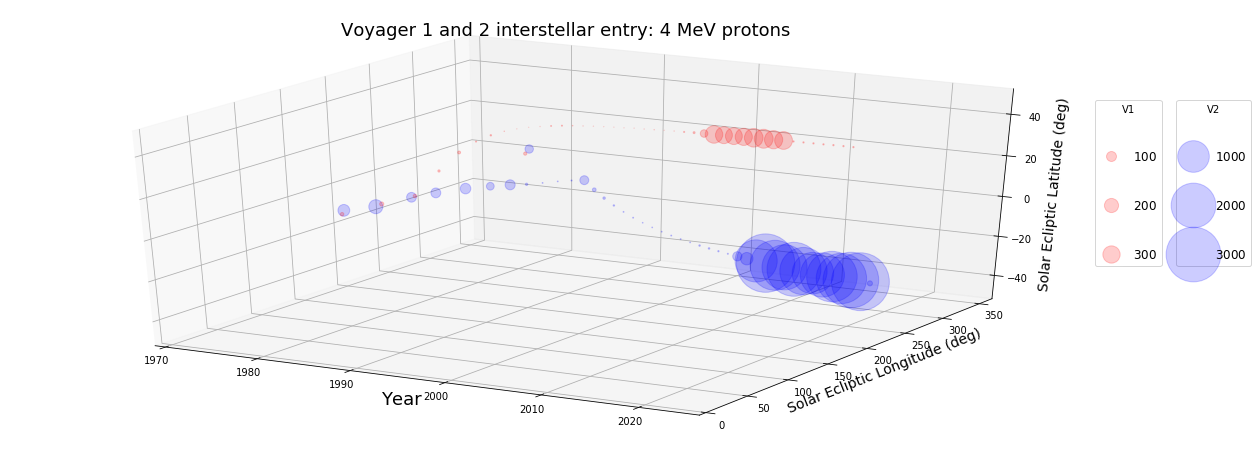

In [48]:
# 3D scatter
# year, lat+long, proton (4 dimensions)

fig = plt.figure(figsize=(20, 8))
ax = plt.axes(projection='3d')
#ax.view_init(200, 140)
#ax.view_init(200, 20)

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

yr = 1976
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11/10

sc = ax.scatter3D(x11, y11, z11, s=s11, c='r', alpha=0.2)
#fig.colorbar(sc)

leg1 = plt.legend(*sc.legend_elements("sizes", num=4, color='r'),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.04, .8))

x22=dfj2.year_v1[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
#s22=np.log(s22)
sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.2)
#sc1 = ax.scatter3D(x22, y22, z22,  s=s22, alpha=0.5)

leg2 = plt.legend(*sc1.legend_elements("sizes", num=4, color='b'),
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.12, .8))

plt.gca().add_artist(leg1)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_zlim3d(-50,50)
ax.set_ylim3d(0,360)

plt.title('Voyager 1 and 2 interstellar entry: 4 MeV protons', fontsize=18)

plt.show()

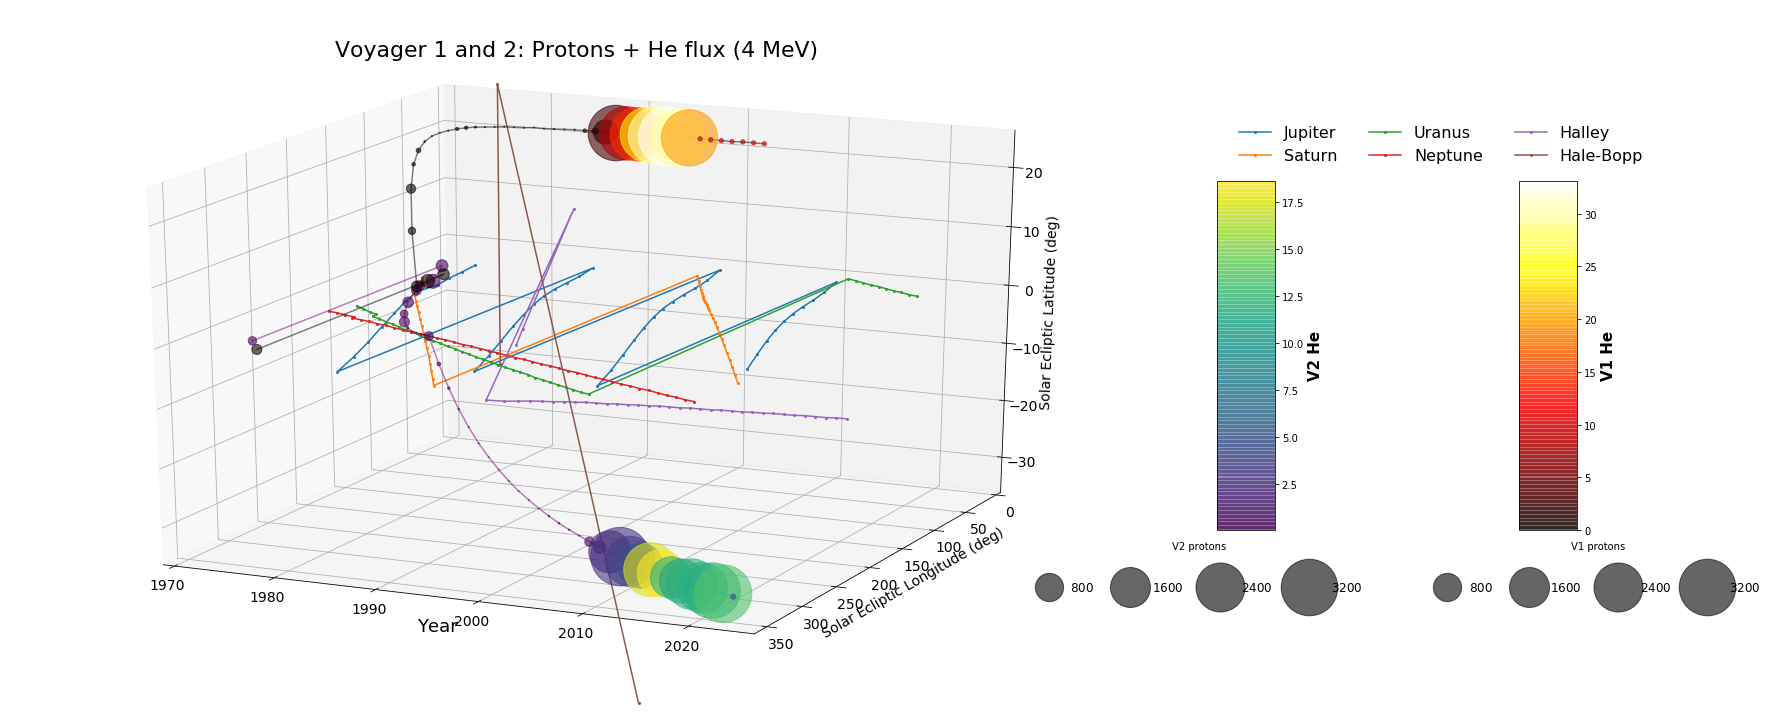

In [49]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)


#Jupiter
url='https://raw.githubusercontent.com/lgavmarin/data/master/Jupiter.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Jupiter')

#Saturn
url='https://raw.githubusercontent.com/lgavmarin/data/master/Saturn.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Saturn')

#Uranus
url='https://raw.githubusercontent.com/lgavmarin/data/master/Uranus.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Uranus')

#Neptune
url='https://raw.githubusercontent.com/lgavmarin/data/master/Neptune.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Neptune')

#Comet Halley
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halley.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Halley')

#Comet Hale-Bopp
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halebopp.lst'
df = pd.read_table(url, sep="\s+")

dff= df[df.YEAR < 1998] #orbit too eccentric to plot reasonably with other celestial objects!

x3=dff.YEAR
z3=dff.SE_LAT
y3=dff.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Hale-Bopp')

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})


yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)


plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)

leg3 = plt.legend([ 'Jupiter','Saturn','Uranus','Neptune','Halley', 'Hale-Bopp'],
                  frameon=False,
                  prop={'size': 16},
                  ncol=3,
                  bbox_to_anchor=(1.45, 0.85))

plt.gca().add_artist(leg2)

#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

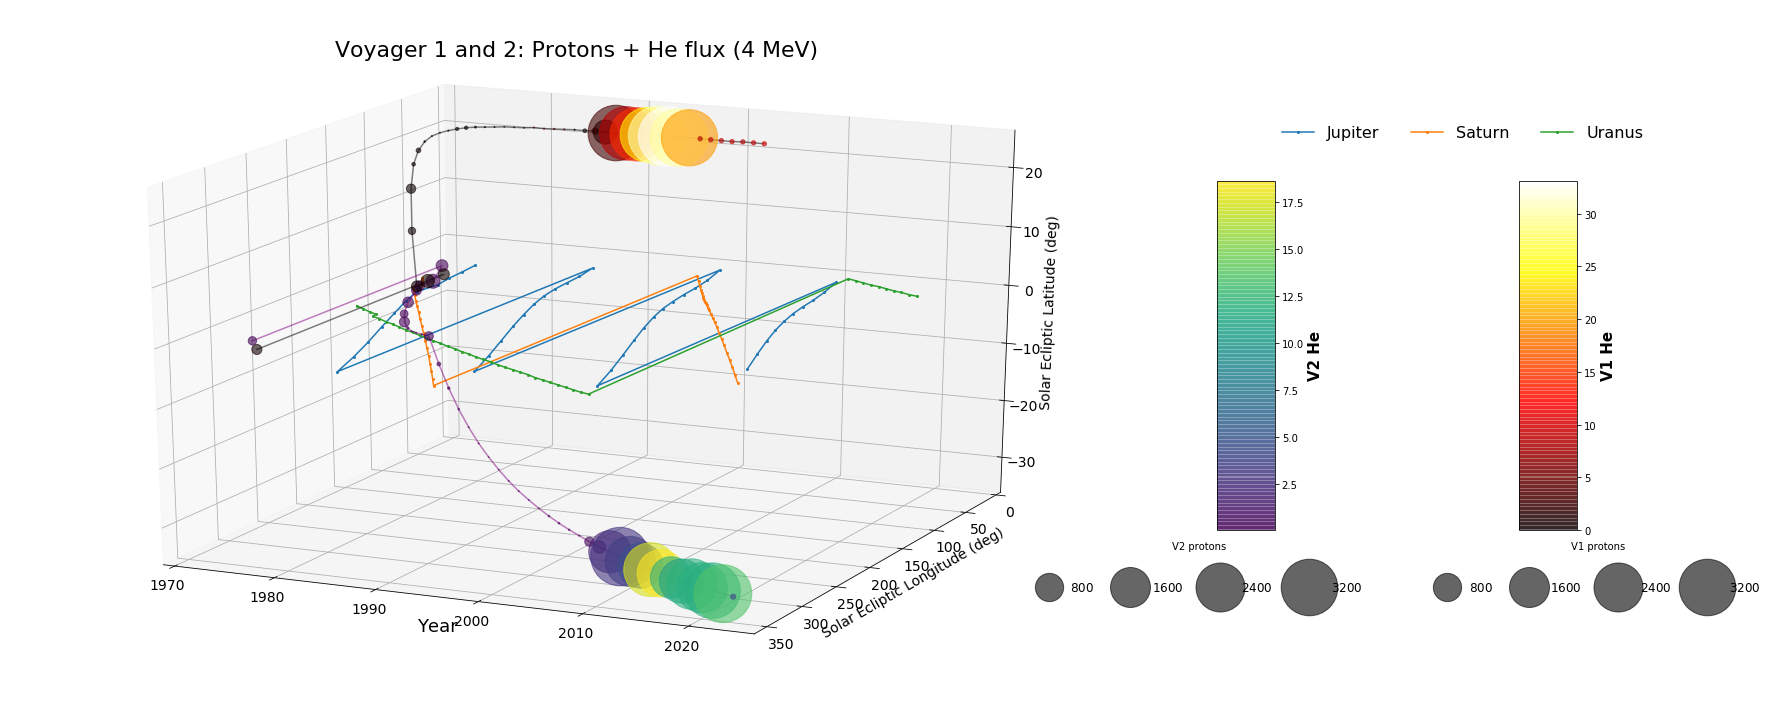

In [50]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)


#Jupiter
url='https://raw.githubusercontent.com/lgavmarin/data/master/Jupiter.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Jupiter')

#Saturn
url='https://raw.githubusercontent.com/lgavmarin/data/master/Saturn.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Saturn')

#Uranus
url='https://raw.githubusercontent.com/lgavmarin/data/master/Uranus.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Uranus')

#Neptune
url='https://raw.githubusercontent.com/lgavmarin/data/master/Neptune.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
#ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Neptune')

#Comet Halley
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halley.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
#ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Halley')

#Comet Hale-Bopp
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halebopp.lst'
df = pd.read_table(url, sep="\s+")

dff= df[df.YEAR < 1998] #orbit too eccentric to plot reasonably with other celestial objects!

x3=dff.YEAR
z3=dff.SE_LAT
y3=dff.SE_LON
#ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Hale-Bopp')

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})


yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)


plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)

leg3 = plt.legend([ 'Jupiter','Saturn','Uranus'],#,'Neptune'],#,'Halley', 'Halley-Bopp'],
                  frameon=False,
                  prop={'size': 16},
                  ncol=3,
                  bbox_to_anchor=(1.45, 0.85))

plt.gca().add_artist(leg2)

#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

In [51]:
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halebopp.lst'
df = pd.read_table(url, sep="\s+")

df
#dff= df[df.YEAR < 2012]
#dff

,YEAR,DAY,RAD_AU,SE_LAT,SE_LON
0,1996,1,5.72,-2.6,282.4
1,1996,366,1.77,42.5,282.9
2,1997,365,3.92,-73.1,104.3
3,1998,365,7.32,-89.4,155.8
4,1999,365,10.13,-83.9,277.0
5,2000,365,12.61,-80.1,279.0
6,2001,364,14.88,-77.5,279.7
7,2002,364,16.99,-75.6,280.1
8,2003,364,18.97,-74.1,280.3
9,2004,364,20.86,-72.9,280.5


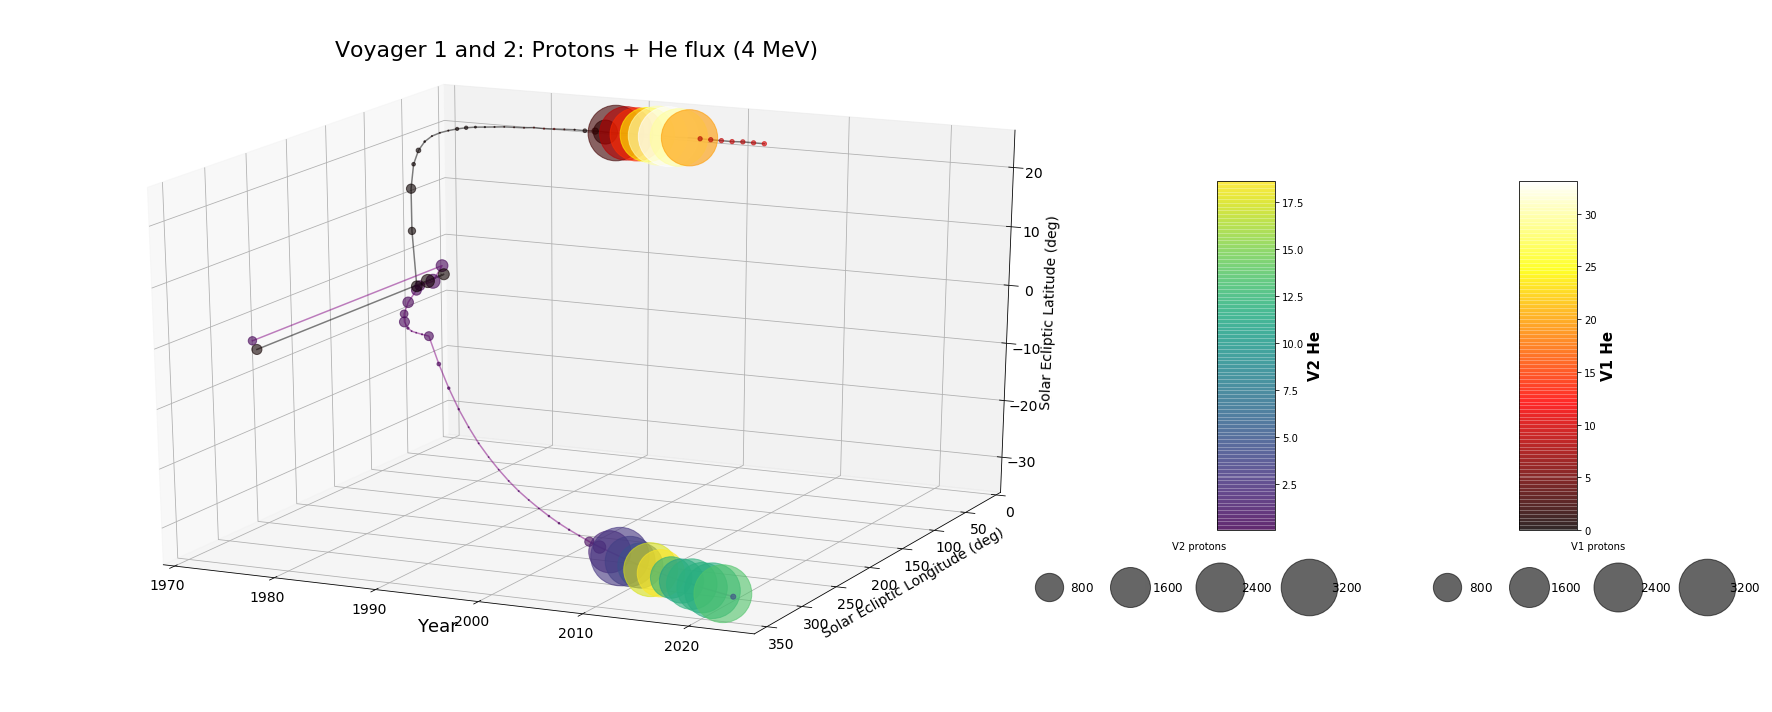

In [52]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)

plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)


#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

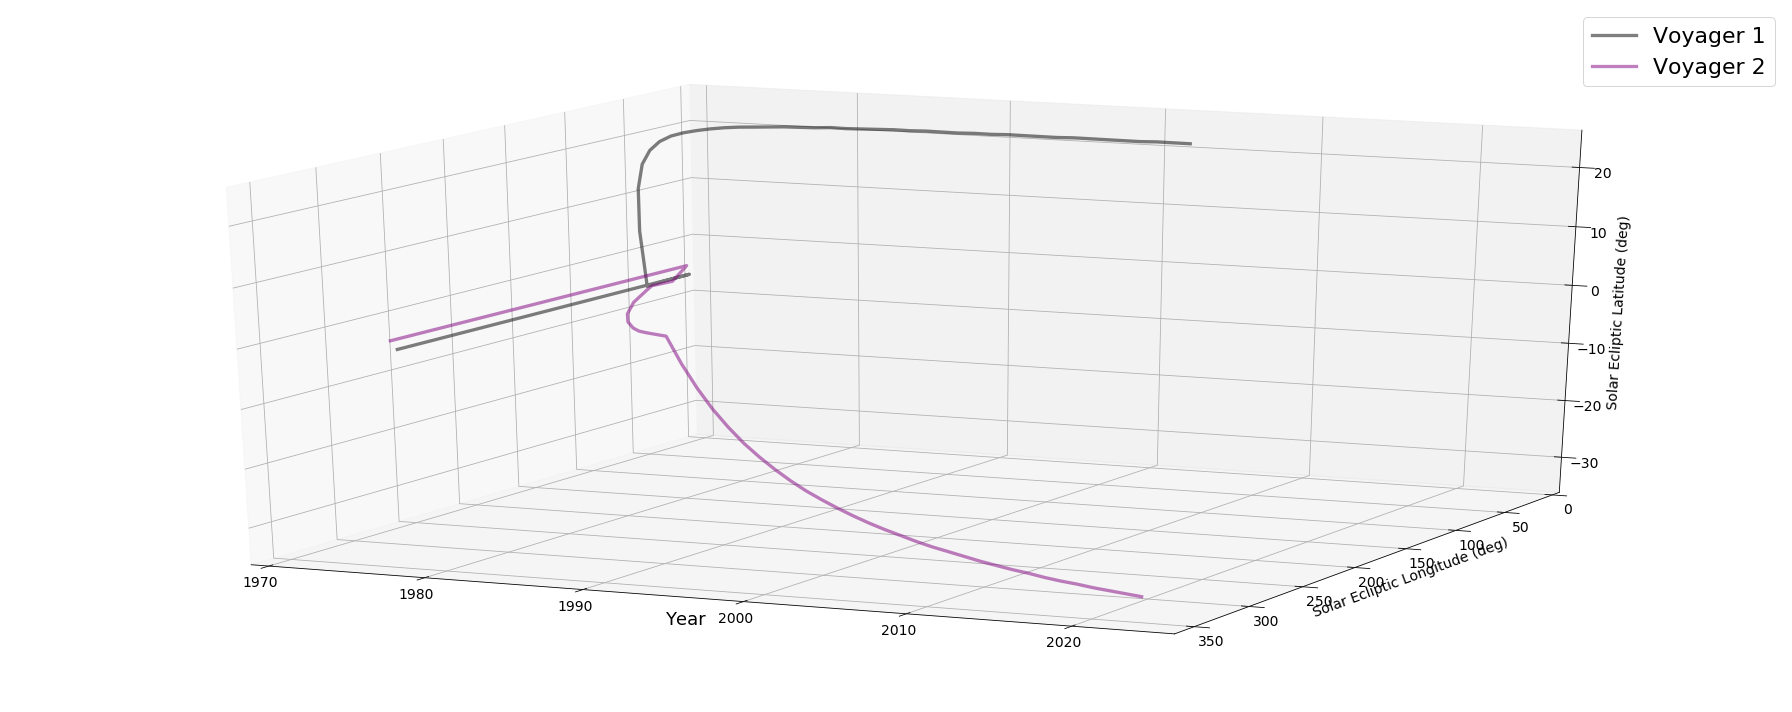

In [79]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

#sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5, label ='Voyager 1', linewidth=3.3)

# plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

# leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
#                   ncol=4,
#                   labelspacing=2.5, 
#                   fontsize = 'large', 
#                   title="V1 protons",
#                   bbox_to_anchor=(1.55, 0.25),
#                   frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)

#sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5, label='Voyager 2', linewidth=3.3)

# plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

# leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
#                   ncol=4,
#                   labelspacing=2.5, 
#                   fontsize = 'large',
#                   title="V2 protons",
#                   bbox_to_anchor=(1.2, 0.25),
#                   frameon=False)

# plt.gca().add_artist(leg1)

plt.legend(prop={'size': 22})
#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


#plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

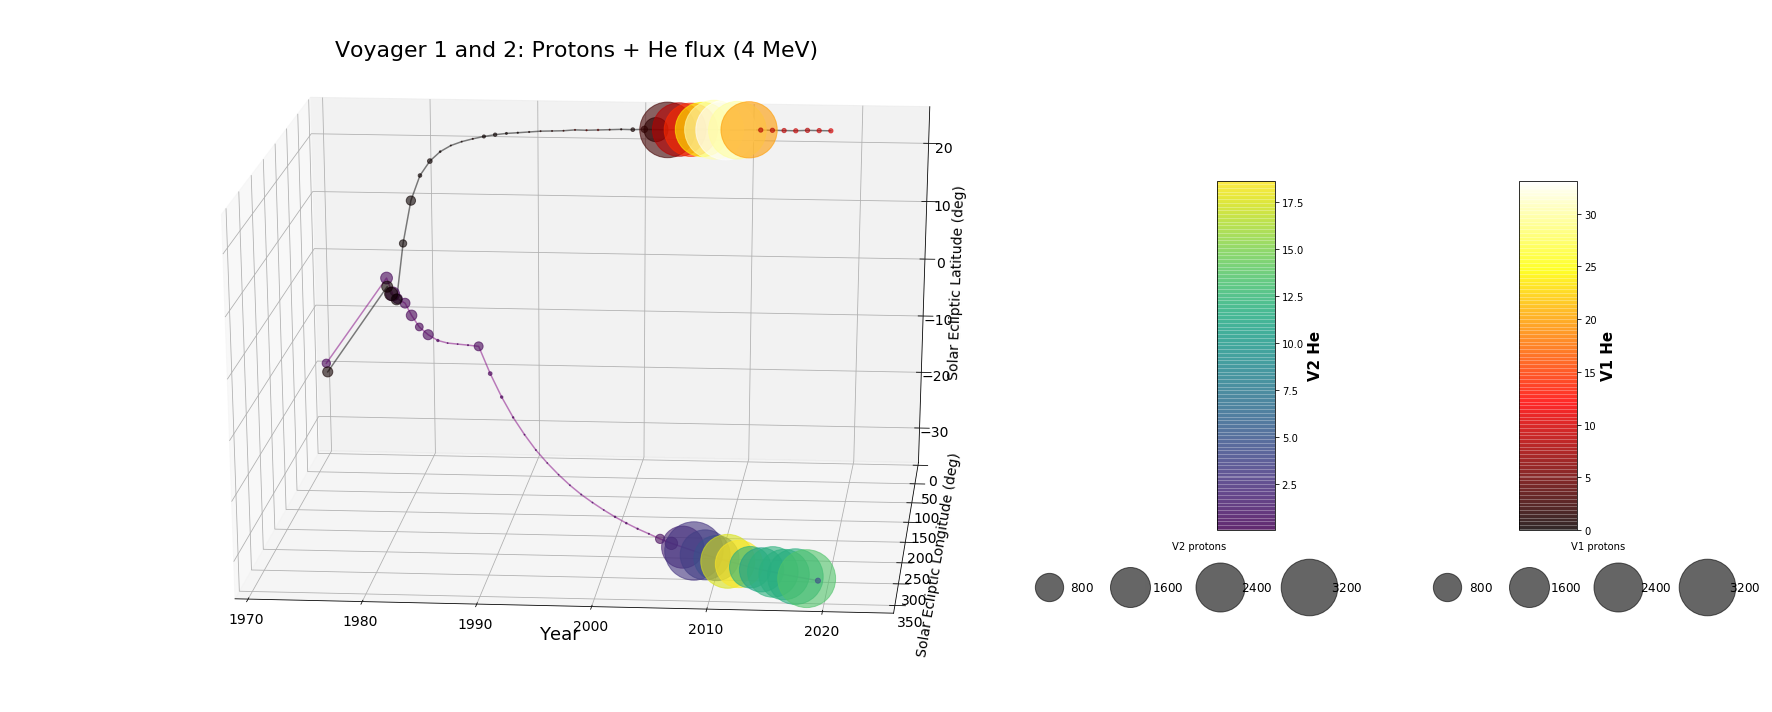

In [53]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 265) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)

plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)


#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

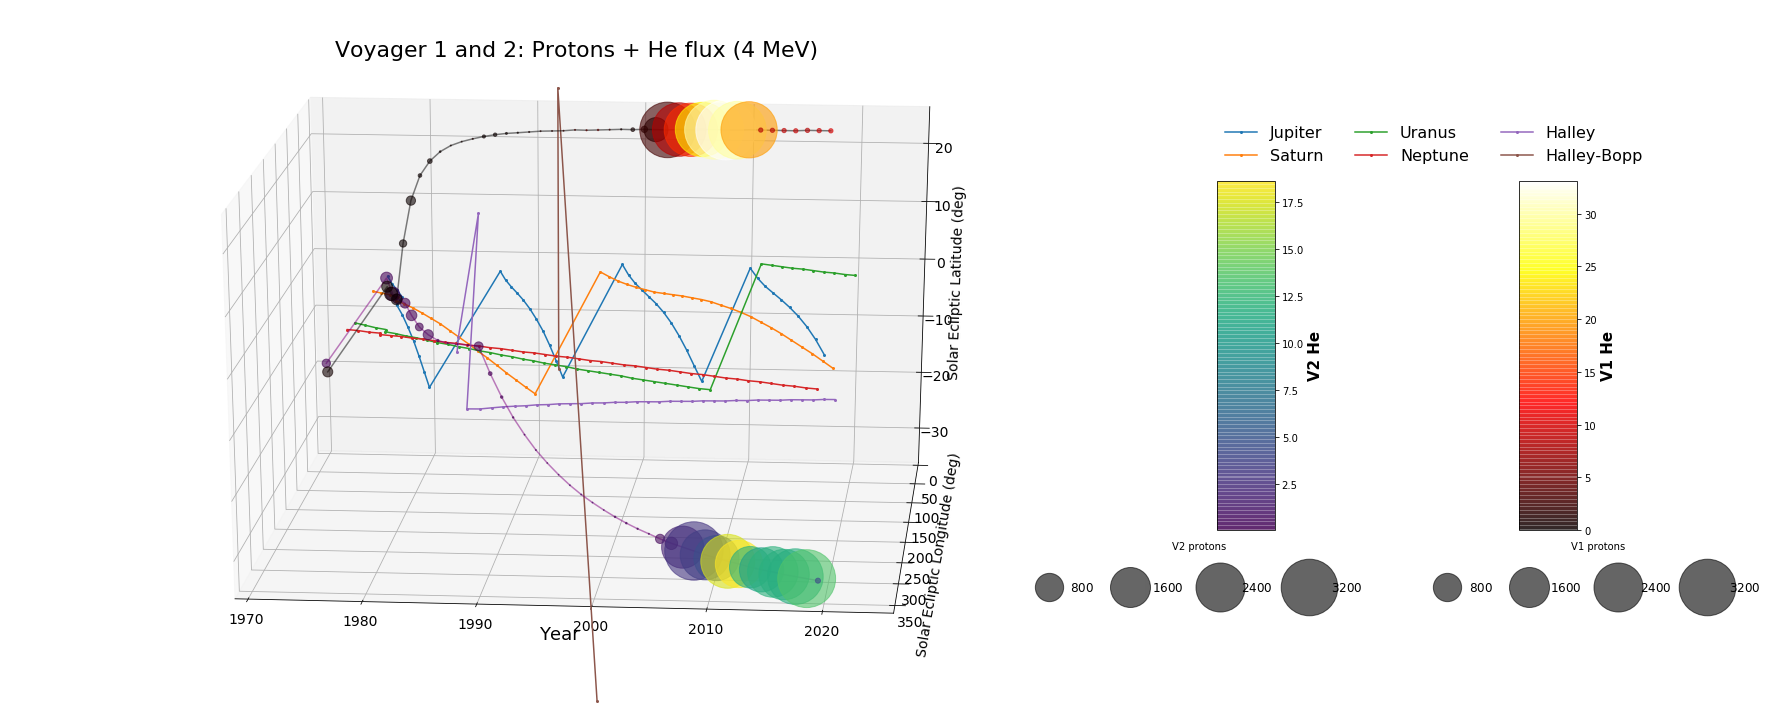

In [54]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 265) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)


#Jupiter
url='https://raw.githubusercontent.com/lgavmarin/data/master/Jupiter.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Jupiter')

#Saturn
url='https://raw.githubusercontent.com/lgavmarin/data/master/Saturn.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Saturn')

#Uranus
url='https://raw.githubusercontent.com/lgavmarin/data/master/Uranus.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Uranus')

#Neptune
url='https://raw.githubusercontent.com/lgavmarin/data/master/Neptune.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Neptune')

#Comet Halley
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halley.lst'
df = pd.read_table(url, sep="\s+")
x3=df.YEAR
z3=df.SE_LAT
y3=df.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Halley')

#Comet Hale-Bopp
url='https://raw.githubusercontent.com/lgavmarin/data/master/Halebopp.lst'
df = pd.read_table(url, sep="\s+")

dff= df[df.YEAR < 1998] #orbit too eccentric to plot reasonably with other celestial objects!

x3=dff.YEAR
z3=dff.SE_LAT
y3=dff.SE_LON
ax.plot3D(x3, y3, z3,  marker='o', markersize=2,  linestyle='-', label='Comet Hale-Bopp')

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})


yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)


plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)

leg3 = plt.legend([ 'Jupiter','Saturn','Uranus','Neptune','Halley', 'Halley-Bopp'],
                  frameon=False,
                  prop={'size': 16},
                  ncol=3,
                  bbox_to_anchor=(1.45, 0.85))

plt.gca().add_artist(leg2)

#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (4 MeV)', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

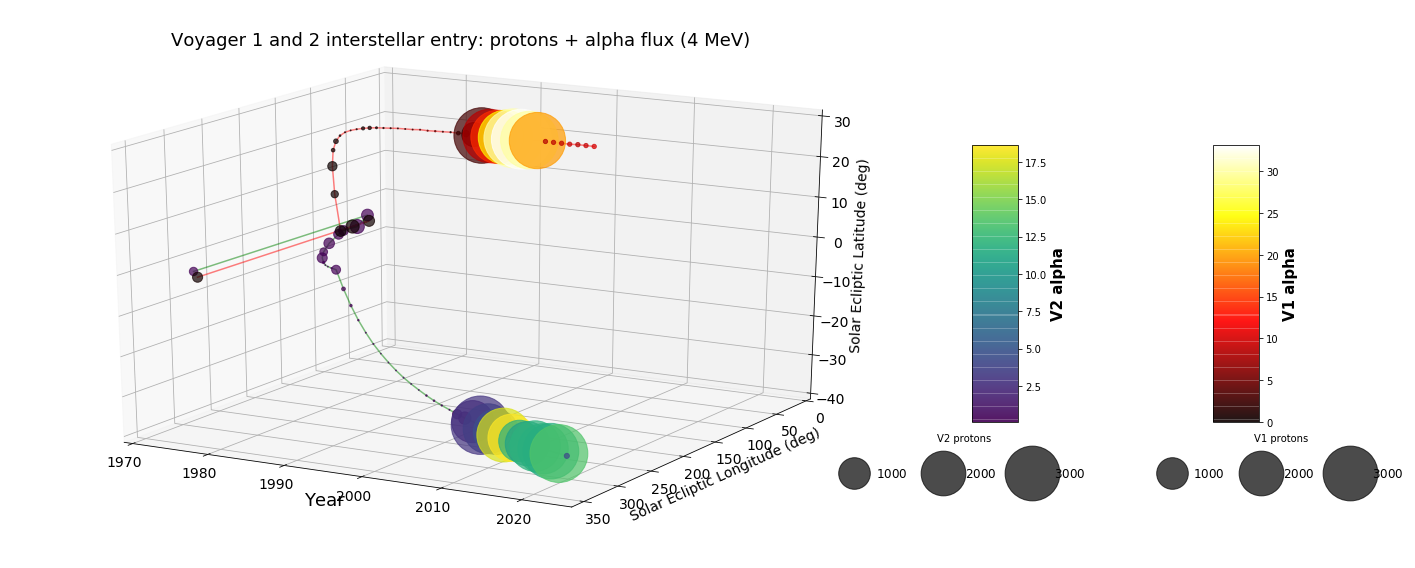

In [55]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 240) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
#s11=np.log(s11)
s11=s11 #/5

#sc = ax.scatter3D(x11, y11, z11, s=s11, c='r', alpha=0.1)
sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.7, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='red', alpha=0.5)


plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 alpha',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=4), #, color='r'),
                  ncol=3,
                  labelspacing=2, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
s22=s22 #/5
#sc1=ax.scatter3D(x22, y22, z22, s=s22, c='b', alpha=0.1)
sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.7)

ax.plot3D(x22, y22, z22,  linestyle='-', color='green', alpha=0.5)


plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 alpha',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=4), #, color='b'),
                  ncol=3,
                  labelspacing=2, 
                  fontsize = 'large', 
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(30, -40)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2 interstellar entry: protons + alpha flux (4 MeV)', fontsize=18)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

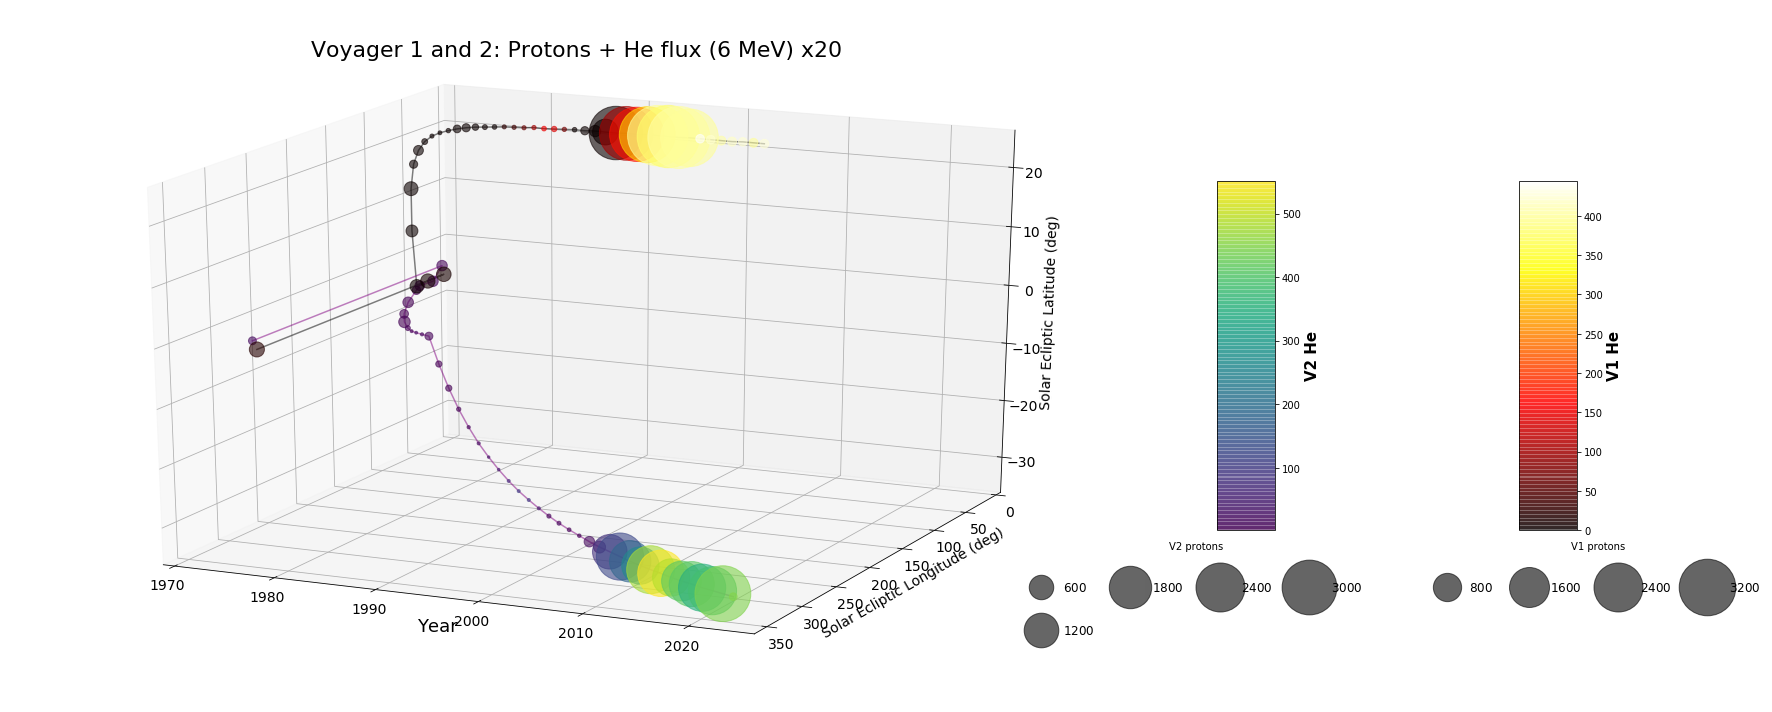

In [56]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p6_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He6_v1[dfj2.year_v1 > yr]
 
fa=20
s11=s11*fa
c11=c11*fa

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p6_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He6_v2[dfj2.year_v1 > yr]
 
s22=s22*fa
c22=c22*fa

sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)

plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)


#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons + He flux (6 MeV) x20', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

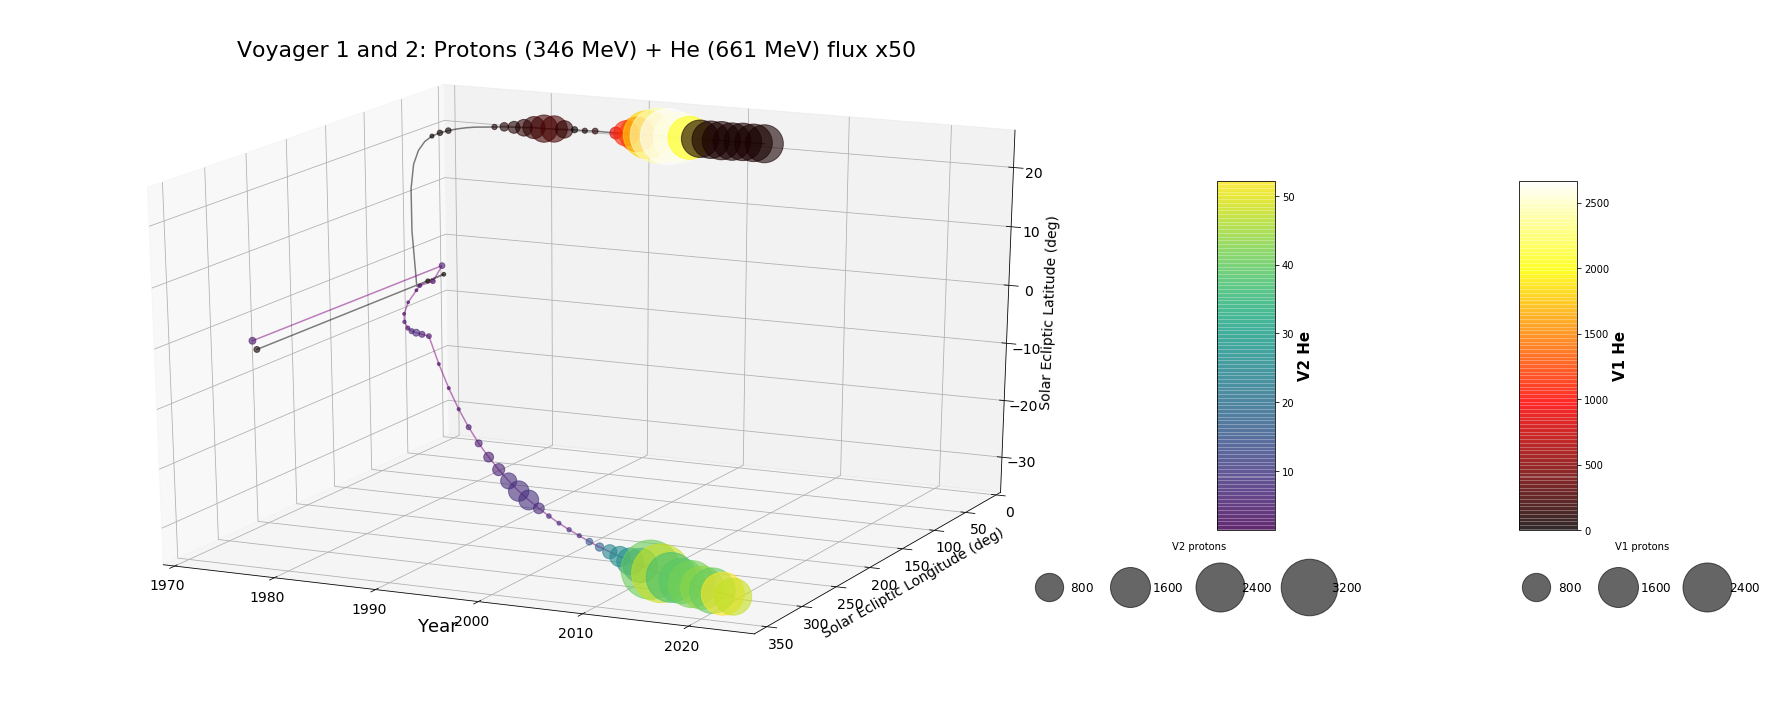

In [57]:
# 3D scatter
# year, lat+long, proton, helium (5 dimensions)
#mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.view_init(200, 140)
#view angle 1:
#ax.view_init(200, 160)
#view angle 2:
#ax.view_init(200, 250) #very realistic, decreasing latitude looks like it's decreasing
ax.view_init(200, 245) 

#latitude : north south, so should be y
#long: east west

#if too many counts try np.log10(s)

ax.set_xlabel('Year', fontsize=18)
ax.set_zlabel('Solar Ecliptic Latitude (deg)', fontsize=14)
ax.set_ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)

#plt.legend(frameon=False,prop={'size': 14})

yr = 1975
x11=dfj2.year_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
y11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p346_v1[dfj2.year_v1 > yr]
c11=dfj2.av_He661_v1[dfj2.year_v1 > yr]
 
fa=50
s11=s11*fa
c11=c11*fa

sc = ax.scatter3D(x11, y11, z11, c=c11, s=s11, alpha=0.6, cmap='hot')

ax.plot3D(x11, y11, z11,  linestyle='-', color='black', alpha=0.5)

plt.colorbar(sc,shrink=0.5, aspect=6).set_label(label='V1 He',size=15,weight='bold')

leg1 = plt.legend(*sc.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large', 
                  title="V1 protons",
                  bbox_to_anchor=(1.55, 0.25),
                  frameon=False)

x22=dfj2.year_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
y22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p346_v2[dfj2.year_v1 > yr]
c22=dfj2.av_He661_v2[dfj2.year_v1 > yr]
 
s22=s22*fa
c22=c22*fa

sc1 = ax.scatter3D(x22, y22, z22, c=c22, s=s22, alpha=0.6)

ax.plot3D(x22, y22, z22,  linestyle='-', color='purple', alpha=0.5)

plt.colorbar(sc1,shrink=0.5, aspect=6).set_label(label='V2 He',size=15,weight='bold')

leg2 = plt.legend(*sc1.legend_elements("sizes", num=5),  
                  ncol=4,
                  labelspacing=2.5, 
                  fontsize = 'large',
                  title="V2 protons",
                  bbox_to_anchor=(1.2, 0.25),
                  frameon=False)

plt.gca().add_artist(leg1)


#plt.xlim(1970,2025)
ax.set_xlim3d(1970,2025)
ax.set_ylim3d(0,360)
ax.set_zlim3d(25, -35)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)


plt.title('Voyager 1 and 2: Protons (346 MeV) + He (661 MeV) flux x50', fontsize=22)

#plt.tight_layout(h_pad=1)
fig.tight_layout()
plt.show()

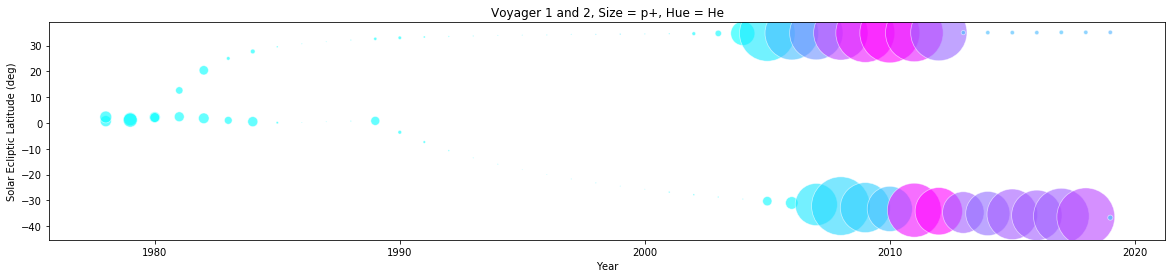

In [58]:
plt.figure(figsize=(20, 4))

#ignore first point in 1977 as the data is strange
yr = 1977
x11=df0.year[df0.year > yr]
y11=df0.av_He4[df0.year > yr]
z11=dfv1.SE_LAT[dfv1.YEAR > yr]
s11=df0.av_p4[df0.year > yr]

x22=df00.year[df0.year > yr]
y22=df00.av_He4[df0.year > yr]
z22=dfv2.SE_LAT[dfv2.YEAR > yr]
s22=df00.av_p4[df0.year > yr]

#Customize seaborn plot
#https://seaborn.pydata.org/tutorial/color_palettes.html
#https://matplotlib.org/users/colormaps.html
# Set the color palette
#sns.set_palette(sns.color_palette("Paired"))

#sns.scatterplot(x1, z1, s=df0.av_p4, hue = df0.av_He4)  #df6 = Voyager 2 1977 
ax = sns.scatterplot(x11, z11, s=s11, hue = y11, alpha = 0.6, legend=False, palette = 'cool')#'winter')#'magma') #palette='inferno') 

#sns.scatterplot(x2, z2, s=df00.av_p4, hue = df00.av_He4)  #df6 = Voyager 2 1977 
sns.scatterplot(x22, z22, s=s22, hue = y22, alpha=0.6, legend=False, palette = 'cool') #palette='viridis')  #df6 = Voyager 2 1977 

ax.set(xlabel='Year', ylabel='Solar Ecliptic Latitude (deg)')

plt.title('Voyager 1 and 2, Size = p+, Hue = He')

#leg_handles = ax.get_legend_handles_labels()[0]

# plt.legend(labels=['Voyager 1', 'Voyager 2'],
#            handles=leg_handles,
#            frameon=False,
#            bbox_to_anchor=(1,0.5),
#            loc="center left",
#            prop={'size': 8})

#leg_handles = ax.get_legend_handles_labels()[0]
#ax.legend(leg_handles, ['Blue', 'Orange'], title='New legend')

plt.show()

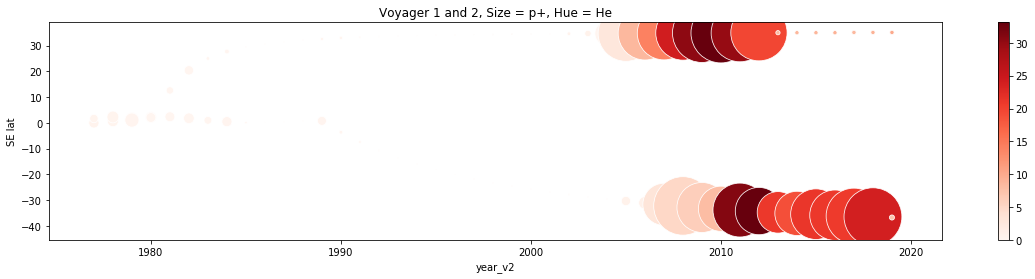

In [59]:
plt.figure(figsize=(20, 4))

#ignore first point in 1977 as the data is strange
yr = 1977
x11=dfj2.year_v1
y11=dfj2.av_He4_v1
z11=dfj2.SE_LAT_v1
s11=dfj2.av_p4_v1

x22=dfj2.year_v2
y22=dfj2.av_He4_v2
z22=dfj2.SE_LAT_v2 
s22=dfj2.av_p4_v2 

#ax = sns.scatterplot(x11, z11, s=s11, hue = y11, alpha = 0.6, palette = 'cool')#'winter')#'magma') #palette='inferno') 

plot = plt.scatter(x11, z11, s=s11, c = y11, cmap='Reds')
plt.clf()
plt.colorbar(plot)
ax = sns.scatterplot(x11, z11, s=s11, hue=y11, palette='Reds')
ax = sns.scatterplot(x22, z22, s=s22, hue=y22, palette='Reds')

ax.set_ylabel('SE lat')
ax.legend_.remove()

plt.title('Voyager 1 and 2, Size = p+, Hue = He')

# Color bar instead of legend
#https://stackoverflow.com/questions/49761221/make-seaborn-show-a-colorbar-instead-of-a-legend-when-using-hue-in-a-bar-plot

plt.show()

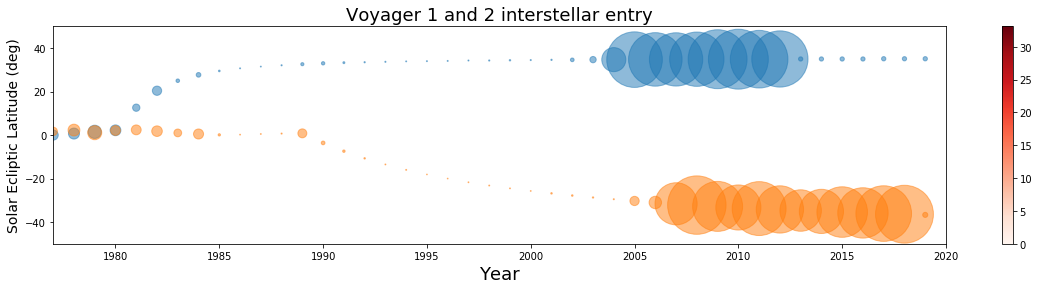

In [60]:
plt.figure(figsize=(20, 4))

#ignore first point in 1977 as the data is strange
yr = 1978
x11=dfj2.year_v1
y11=dfj2.av_He4_v1
z11=dfj2.SE_LAT_v1
s11=dfj2.av_p4_v1

x22=dfj2.year_v2
y22=dfj2.av_He4_v2
z22=dfj2.SE_LAT_v2 
s22=dfj2.av_p4_v2 

#ax = sns.scatterplot(x11, z11, s=s11, hue = y11, alpha = 0.6, palette = 'cool')#'winter')#'magma') #palette='inferno') 

plot = plt.scatter(x11, z11, s=s11, c = y11, cmap='Reds')
plt.clf()
plt.colorbar(plot)
plt.scatter(x11, z11, s=s11, alpha=0.5)
plt.scatter(x22, z22, s=s22, alpha=0.5)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry', fontsize=18)

plt.show()

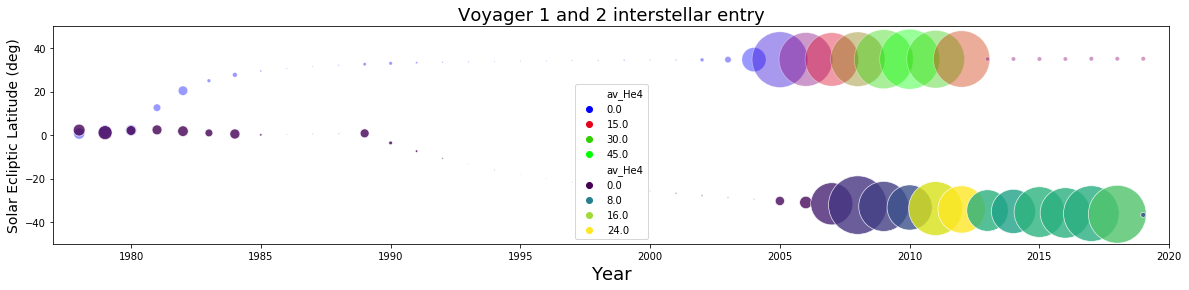

In [61]:
#sns.set_style("white")

plt.figure(figsize=(20, 4))

#ignore first point in 1977 as the data is strange
yr = 1977
x11=df0.year[df0.year > yr]
y11=df0.av_He4[df0.year > yr]
z11=dfv1.SE_LAT[dfv1.YEAR > yr]
s11=df0.av_p4[df0.year > yr]

x22=df00.year[df0.year > yr]
y22=df00.av_He4[df0.year > yr]
z22=dfv2.SE_LAT[dfv2.YEAR > yr]
s22=df00.av_p4[df0.year > yr]

#sns.scatterplot(x1, z1, s=df0.av_p4, hue = df0.av_He4)  #df6 = Voyager 2 1977 
#ax = sns.scatterplot(x11, z11, s=s11, hue = y11, alpha = 0.4, palette = 'brg')#'winter')#'magma') #palette='inferno') 

ax = sns.scatterplot(x11, z11, s=s11, hue = y11, alpha = 0.4, palette = 'brg')#'winter')#'magma') #palette='inferno') 

#sns.scatterplot(x2, z2, s=df00.av_p4, hue = df00.av_He4)  #df6 = Voyager 2 1977 
#sns.scatterplot(x22, z22, s=s22, hue = y22, alpha=0.6, legend=False, palette = 'Accent') #palette='viridis')  #df6 = Voyager 2 1977 
sns.scatterplot(x22, z22, s=s22, hue = y22, alpha=0.8, palette='viridis')  #df6 = Voyager 2 1977 
#sns.scatterplot(x22, z22,  hue = y22, alpha=0.8, palette='brg')  #df6 = Voyager 2 1977 


plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry', fontsize=18)


plt.show()

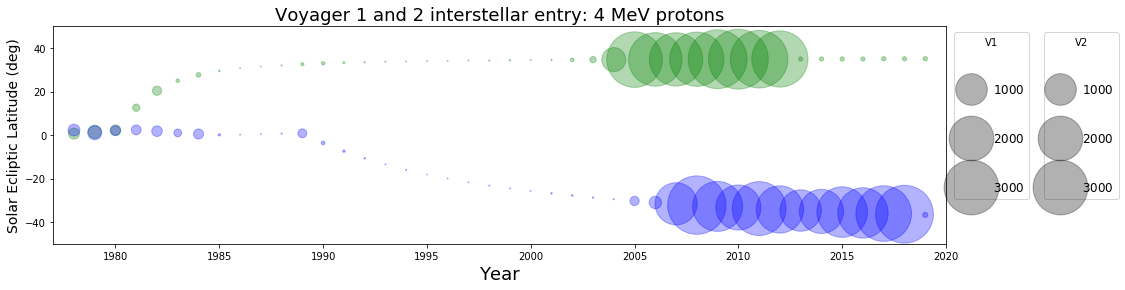

In [62]:
plt.figure(figsize=(16, 4))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1977

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 4 MeV protons', fontsize=18)
plt.show()

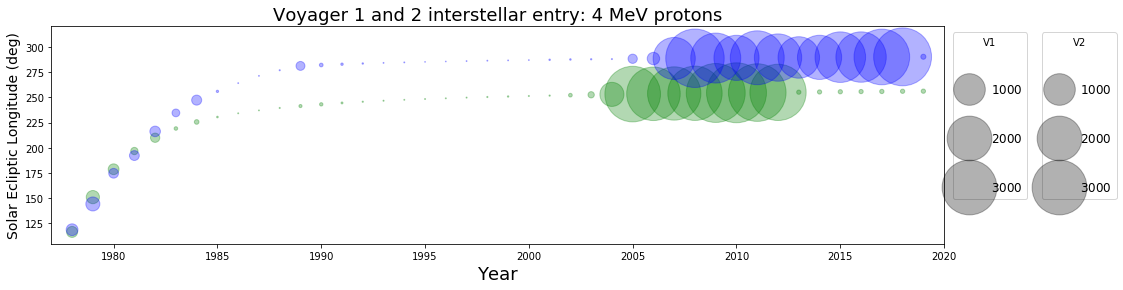

In [63]:
plt.figure(figsize=(16, 4))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1977

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]

z11=dfj2.SE_LON_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p4_v1[dfj2.year_v1 > yr]


x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]

z22=dfj2.SE_LON_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p4_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

#plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Longitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 4 MeV protons', fontsize=18)
plt.show()

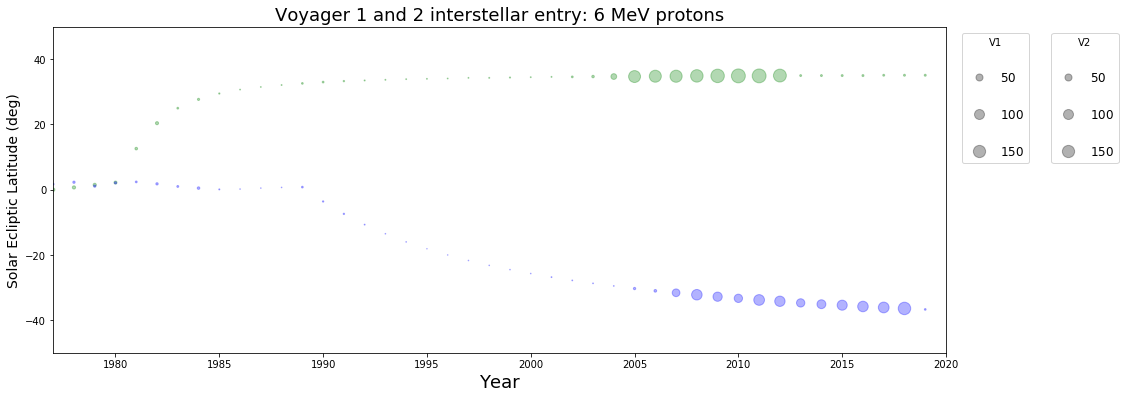

In [64]:
plt.figure(figsize=(16, 6))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1976

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p6_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p6_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=2, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=4),
          # loc="lower right",
           labelspacing=2, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 6 MeV protons', fontsize=18)
plt.show()

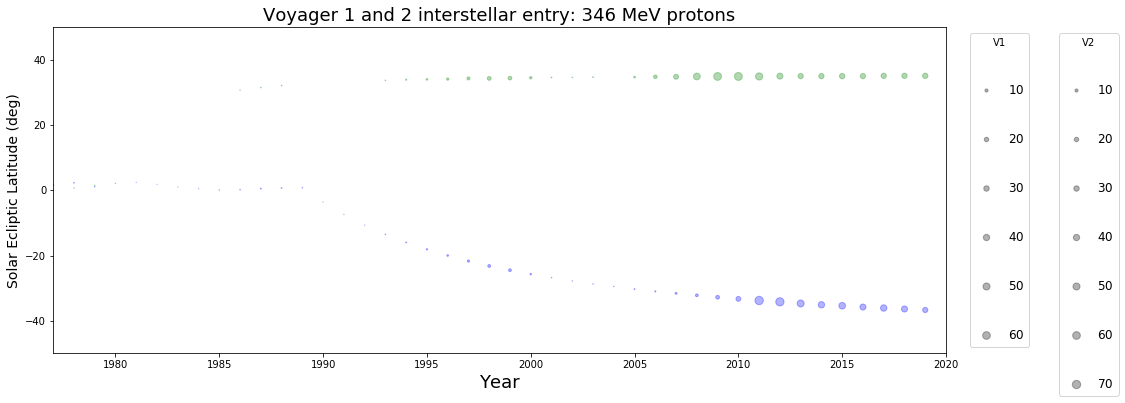

In [65]:
plt.figure(figsize=(16, 6))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1976

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_p346_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_p346_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 346 MeV protons', fontsize=18)
plt.show()

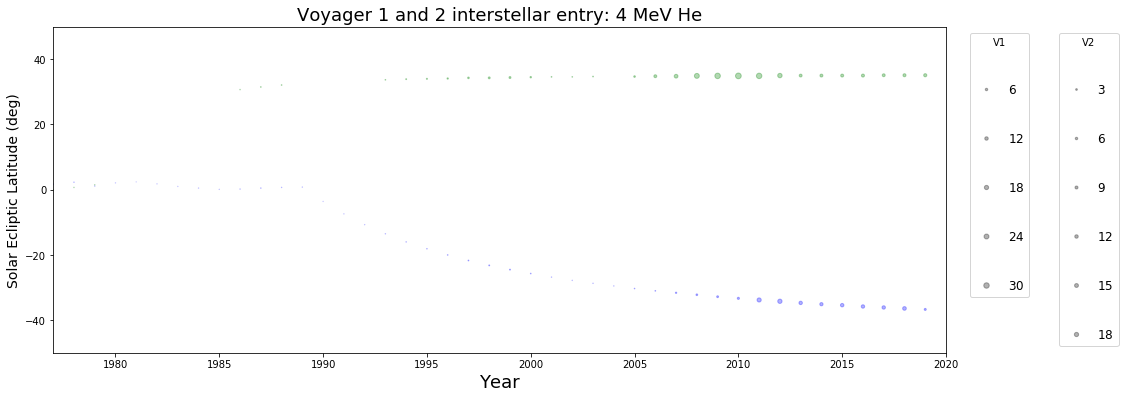

In [66]:
plt.figure(figsize=(16, 6))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1976

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_He4_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_He4_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 4 MeV He', fontsize=18)
plt.show()

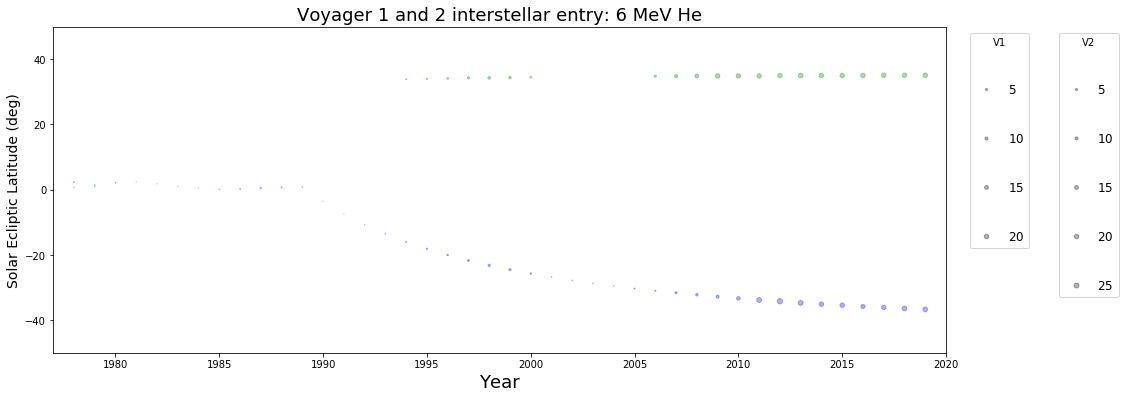

In [67]:
plt.figure(figsize=(16, 6))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1976

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_He6_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_He6_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 6 MeV He', fontsize=18)
plt.show()

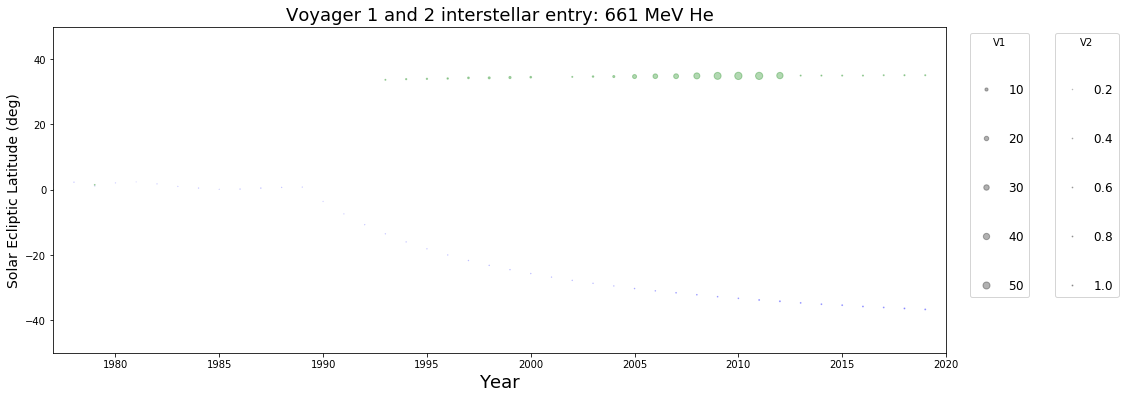

In [68]:
plt.figure(figsize=(16, 6))

#ignore first point in 1977 as the CR is biased for Sun
yr = 1976

x11=dfj2.year_v1[dfj2.year_v1 > yr]
y11=dfj2.av_He4_v1[dfj2.year_v1 > yr]
z11=dfj2.SE_LAT_v1[dfj2.year_v1 > yr]
s11=dfj2.av_He661_v1[dfj2.year_v1 > yr]

x22=dfj2.year_v2[dfj2.year_v1 > yr]
y22=dfj2.av_He4_v2[dfj2.year_v1 > yr]
z22=dfj2.SE_LAT_v2[dfj2.year_v1 > yr]
s22=dfj2.av_He661_v2[dfj2.year_v1 > yr]

sc = plt.scatter(x11, z11, s=s11, alpha = 0.3, label='Voyager 1: p 4 MeV', c='g')
leg1 = plt.legend(*sc.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 4, 
           fontsize = 'large', 
           title="V1",
           bbox_to_anchor=(1.1, 1.0))

sc1=plt.scatter(x22, z22, s=s22, alpha = 0.3, label='Voyager 2: p 4 MeV', c='b')
leg2 = plt.legend(*sc1.legend_elements("sizes", num=6),
          # loc="lower right",
           labelspacing=3, 
           #loc = 3, 
           fontsize = 'large', 
           title="V2",
           bbox_to_anchor=(1.2, 1.0))

plt.gca().add_artist(leg1)

plt.ylim(-50, 50)
plt.xlim(1977,2020)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Solar Ecliptic Latitude (deg)', fontsize=14)
plt.title('Voyager 1 and 2 interstellar entry: 661 MeV He', fontsize=18)
plt.show()

In [69]:
#Altair
import altair as alt

#log10(a)

c = alt.Chart(dfj2).mark_circle(size=80).encode(
    x=alt.X('year_v1:Q', axis=alt.Axis(format='f', title='Year'),scale=alt.Scale(zero=False, padding=0)),
    y=alt.Y('SE_LAT_v1:Q', axis=alt.Axis(format='f', title='SE LAT V1'), scale=alt.Scale(domain=[0,50], clamp=True)),
    color=alt.Color('av_He4_v1:Q'), #, scale=alt.Scale(scheme='paired')),   #set1 category10 paired dark2
    size=alt.Size('av_p4_v1:Q'),
    tooltip=['year_v1', 'SE_LAT_v1', 'av_He4_v1', 'av_p4_v1'], # tooltips show selected column values when you hover over points
    opacity=alt.value(0.6)
    ).properties(
    title='Voyager 1: 4 MeV protons, 4 MeV He',
      width=800,
      height=400).configure_axis(
    labelFontSize=14,
    titleFontSize=14
      ).configure_title(fontSize=20, anchor="middle")


c


alt.Chart(...)

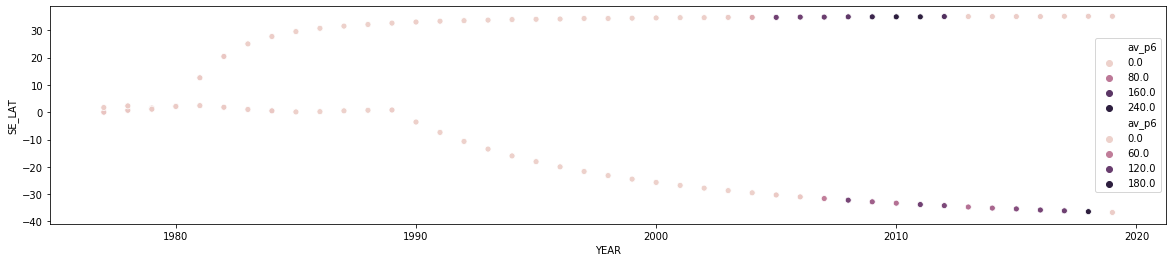

In [70]:
plt.figure(figsize=(20, 4))
sns.scatterplot(x1, z1, hue=df0.av_p6)  #df6 = Voyager 2 1977 
sns.scatterplot(x2, z2, hue=df00.av_p6)  #df6 = Voyager 2 1977 

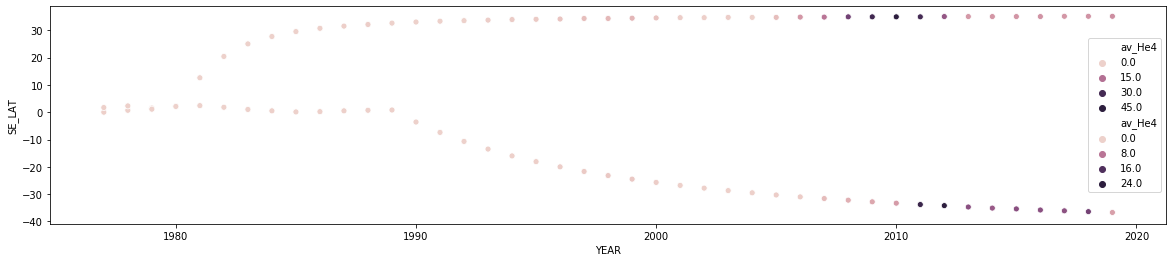

In [71]:
plt.figure(figsize=(20, 4))
sns.scatterplot(x1, z1, hue=df0.av_He4)#, size=y1)  #df6 = Voyager 2 1977 
sns.scatterplot(x2, z2, hue=df00.av_He4)#, size=y2)  #df6 = Voyager 2 1977 